#Importação das bibliotecas e upload da database:

In [ ]:
!pip install pyforest
!pip install quickda
!pip install scikit-optimize
!pip install mlxtend
!pip install pandas-profiling[notebook]

In [ ]:
#biblioteca que importa mais de 40 populares bibliotecas de Data Science
import pyforest
import warnings
import time
warnings.filterwarnings("ignore")
#biblioteca de análises de dados
from pandas_profiling import ProfileReport
#bibliotecas para análises gráficas
from cycler import cycler
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
%matplotlib inline
#bibliotecas para Machine Learning
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.externals import joblib

from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid

from skopt import BayesSearchCV
from mlxtend.classifier import StackingCVClassifier

In [ ]:
lazy_imports()

['from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.impute import SimpleImputer',
 'from scipy import stats',
 'import pandas as pd',
 'from sklearn.model_selection import train_test_split',
 'import torch',
 'import fastai',
 'import glob',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import re',
 'import pydot',
 'import os',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.cluster import KMeans',
 'from sklearn.decomposition import PCA',
 'import keras',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.linear_model import LassoCV',
 'from pyspark import SparkContext',
 'from xlrd import open_workbook',
 'from fbprophet import Prophet',
 'from openpyxl import load_workbook',
 'import fbprophet',
 'from sklearn.preprocessing import LabelEncoder',
 'import gensim',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn import metrics',
 'from sklearn.linear_model import RidgeCV',
 'import altai

In [ ]:
data = pd.read_excel('https://github.com/EnzoGolfetti/bootcamp_ds_aplicada/blob/main/projeto_prever_uti_sirio_libanes_alura/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true')

In [ ]:
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

#Definindo funções e parâmetros padrões

In [ ]:
mpl.rcParams['font.size'] = 12 
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#0475BD', '#FF0000', '#FFF200', '#7D3E11'])
mpl.rcParams['figure.figsize'] = [12,8]
mpl.rcParams['axes.linewidth'] = 1.25
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.style.use('seaborn-whitegrid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def def_eixos(axs: vars, xlabel: str, ylabel: str, title: str, suptitle: str):
  """Função que plota os nomes do eixos de forma eficiente e rápida
  Utilizada com 'ax' como plt.subplot ou subplots """
  axs.set_xlabel(xlabel)
  axs.set_ylabel(ylabel)
  axs.set_title(title)
  plt.suptitle(suptitle, fontsize=20)

In [ ]:
def make_bar_plot(dados, x, y, palette, xlabel, ylabel, title, suptitle):
  fig, ax = plt.subplots()
  sns.barplot(ax=ax, data=dados, x=x, y=y, palette=palette)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  plt.suptitle(suptitle, fontsize=20)
  plt.show()

In [ ]:
def make_df_value_counts(coluna_df, coluna_df1, coluna_df2, coluna_df3, coluna_df4, coluna_df5,
                         coluna_df6, coluna_df7, coluna_df8, palette, suptitle):
  """Função que transforma o value_counts em DataFrame e o plota como barplot do Seaborn"""
  dg = pd.DataFrame(coluna_df.value_counts())
  array_col = dg.columns.values
  coluna = array_col[0]

  dg1 = pd.DataFrame(coluna_df1.value_counts())
  array_col1 = dg1.columns.values
  coluna1 = array_col1[0]

  dg2 = pd.DataFrame(coluna_df2.value_counts())
  array_col2 = dg2.columns.values
  coluna2 = array_col2[0]

  dg3 = pd.DataFrame(coluna_df3.value_counts())
  array_col3 = dg3.columns.values
  coluna3 = array_col3[0]

  dg4 = pd.DataFrame(coluna_df4.value_counts())
  array_col4 = dg4.columns.values
  coluna4 = array_col4[0]

  dg5 = pd.DataFrame(coluna_df5.value_counts())
  array_col5 = dg5.columns.values
  coluna5 = array_col5[0]

  dg6 = pd.DataFrame(coluna_df6.value_counts())
  array_col6 = dg6.columns.values
  coluna6 = array_col6[0]

  dg7 = pd.DataFrame(coluna_df7.value_counts())
  array_col7 = dg7.columns.values
  coluna7 = array_col7[0]

  dg8 = pd.DataFrame(coluna_df8.value_counts())
  array_col8 = dg8.columns.values
  coluna8 = array_col8[0]

  fig, ax = plt.subplots(3,3, figsize=(15,15))
  sns.barplot(ax=ax[0,0], data=dg, x=dg.index, y=coluna, palette=palette)
  sns.barplot(ax=ax[0,1], data=dg1, x=dg1.index, y=coluna1, palette=palette)
  sns.barplot(ax=ax[0,2], data=dg2, x=dg2.index, y=coluna2, palette=palette)
  sns.barplot(ax=ax[1,0], data=dg3, x=dg3.index, y=coluna3, palette=palette)
  sns.barplot(ax=ax[1,1], data=dg4, x=dg4.index, y=coluna4, palette=palette)
  sns.barplot(ax=ax[1,2], data=dg5, x=dg5.index, y=coluna5, palette=palette)
  sns.barplot(ax=ax[2,0], data=dg6, x=dg6.index, y=coluna6, palette=palette)
  sns.barplot(ax=ax[2,1], data=dg7, x=dg7.index, y=coluna7, palette=palette)
  sns.barplot(ax=ax[2,2], data=dg8, x=dg8.index, y=coluna8, palette=palette)
  ax[0,1].set_title('1 = Positivo, 0 = Negativo')
  plt.suptitle(suptitle, fontsize=20)
  plt.show()

In [ ]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [ ]:
def limpa_dados(dados):
  a_remover = dados.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
  dados = dados.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
  dados = dados.dropna()
  return dados 

In [ ]:
def prepare_window(rows):
    if (np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

In [ ]:
def run_models_com_plot(model, data: pd.DataFrame):

  #prepara os dados
  np.random.seed(478561)
  data = data.sample(frac=1).reset_index(drop=True)
  x = data.drop(['ICU'], axis=1)
  y = data['ICU']

  x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y)

  #roda o modelo
  model.fit(x_train, y_train)
  y_predict = model.predict(x_test)
  y_proba = model.predict_proba(x_test)

  #calcula as métricas
  accu = accuracy_score(y_test, y_predict)
  auc = roc_auc_score(y_test, y_proba[:,1])
  report_class = classification_report(y_test, y_predict, output_dict=True)
  report_class = pd.DataFrame(report_class).T

  #plota as métricas
  print(f"Accuracy Score = {accu}")
  print(f"AUC = {auc}")
  print("Report:")
  #plota a AUC graficamente
  ax = plt.subplot()
  ax.set_title('Gráfico da AUC')
  plot_roc_curve(model, x_test, y_test, ax=ax)
  plot_confusion_matrix(model, x_test, y_test)
  return report_class

In [ ]:
def roda_n_modelos(modelo, data, n):
    #prepara os dados
    np.random.seed(6524320)
    data = data.sample(frac=1).reset_index(drop=True)
    y = data["ICU"]
    x = data.drop(["ICU"], axis=1)
    
    #roda o modelo
    auc_lista = []
    recall_lista = []
    for _ in range(n):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

        modelo.fit(x_train, y_train)
        y_pred = modelo.predict(x_test)
        prob_predic = modelo.predict_proba(x_test)
        auc = roc_auc_score(y_test, prob_predic[:,1])
        auc_lista.append(auc)
        recall_points = recall_score(y_test,y_pred)
        recall_lista.append(recall_points)
    #computa e plota os resultados
    auc_medio = np.mean(auc_lista)
    auc_std = np.std(auc_lista)
    recall_medio = np.mean(recall_lista)
    print(f"AUC médio: {auc_medio}")
    print(f"Intervalo {auc_medio - 2* auc_std} - {auc_medio + 2* auc_std}")
    print(f"Recall médio: {recall_medio}")

In [ ]:
def roda_modelo_cv(modelo, data, n_splits, n_repeats):

    #prepara os dados
    np.random.seed(68568)
    data = data.sample(frac=1).reset_index(drop=True)
    y = data["ICU"]
    x = data.drop(["ICU"], axis=1)
    
    #roda a cross validation
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)
    resultados=cross_validate(modelo, x, y, cv=cv, scoring='roc_auc')
    
    #computa os resultados
    auc_medio = np.mean(resultados['test_score'])
    auc_std = np.std(resultados['test_score'])
    
    #plota os resultados
    print(f"AUC Médio {auc_medio} Intervalo {auc_medio - (2*auc_std)} - {auc_medio + (2*auc_std)}")

In [ ]:
#def para rodar o BayesSearchCV()
def tuna_hiperparametros(x_train_data, x_test_data, y_train_data, y_test_data, 
                         estimator, grid_params, n_iter=50, cv=10, scoring_test=roc_auc_score):
  #instância a classe BayesSearchCV
  bs = BayesSearchCV(
      estimator=estimator,
      search_spaces=grid_params,
      n_iter=n_iter,
      cv=cv,
      n_jobs=2,
      verbose=0,
      random_state=546153
  )

  #fita e treina o bs
  modelo_fitado = bs.fit(x_train_data, y_train_data)
  melhor_modelo = modelo_fitado.best_estimator_
  best_params_bs = modelo_fitado.best_params_

  pred_proba = modelo_fitado.predict_proba(x_test_data)
  score = scoring_test(y_test_data, pred_proba[:,1])

  #retorna os dados de pontuação, modelo e parâmetros
  return [melhor_modelo, pred_proba, score, best_params_bs]

#Exploratory Data Analysis

Nesta seção vamos explorar os dados, entendendo as features e o que já podemos enxergar nesses dados, sempre com a ideia de como prever a entrada na UTI em mente.

In [ ]:
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [ ]:
pd.set_option('display.max_columns',231)
print(list(data.columns))

['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEDIAN', 'ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX', 'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN', 'BE_VENOUS_MIN', 'BE_VENOUS_MAX', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_MEDIAN', 'BIC_VENOUS_MEAN', 'BIC_VENOUS_MIN', 'BIC_VENOUS_MAX', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_MEDIAN', 'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_MEDIAN', 'CALCIUM_MEAN', 'CALCIUM_MIN', 'CALCIUM_MAX', 'CALCIUM_DIFF', 'CREATININ_MEDIAN', 'CREATININ_MEAN', 'CREATI

Como devidamente documentado pela equipe do Sírio-Libanês na documentação do dataset no [Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19), ele é dividido em 4 seções:

- Informações demográficas (03);
- Doenças prévias agrupadas (09);
- Resultados de exames de sangua (36);
- Sinais Vitais (06).

Alguns dos resultados de exames de sangue e dos sinais vitais estão abertos em máximo, mínimo, diferença (max - min), média, mediana e diferenção relativa (max/mediana).

Uma forma rápida e eficiente de descrever os dados é utilizando um Profile Report, este ficará disponível na pasta de arquivos no GitHub neste [link](https://github.com/EnzoGolfetti/bootcamp_ds_aplicada/blob/main/projeto_prever_uti_sirio_libanes_alura/resumo_dataset_covid_sirio.html).

In [ ]:
#Olhando para os dados resumidos com o pandas_profilling
profile = ProfileReport(data, title="Resumo dataset COVID-19 - Clinical Data to assess diagnosis", minimal=True)
profile.to_file('resumo_dataset_covid_sirio.html')

##Observando os dados demográficos

---
As colunas de dados demográficos são as colunas: idade_acima_65, percentil_idade, gênero.

Como há registros de 5 janelas para cada paciente, numa conta rápida vemos portanto que temos apenas 385 pacientes no dataset, vamos selecionar apenas uma janela de cada um deles para os dados demográficos para fins de eficiência.


In [ ]:
data['PATIENT_VISIT_IDENTIFIER'].value_counts()

384    5
191    5
121    5
122    5
123    5
      ..
258    5
259    5
260    5
261    5
0      5
Name: PATIENT_VISIT_IDENTIFIER, Length: 385, dtype: int64

In [ ]:
demographic_data = data.loc[:,["PATIENT_VISIT_IDENTIFIER",
                        "AGE_ABOVE65", 
                        "AGE_PERCENTIL",
                        "GENDER"]]

In [ ]:
demographic_data = demographic_data.drop_duplicates()

In [ ]:
demographic_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER
0,0,1,60th,0
5,1,1,90th,1
10,2,0,10th,0
15,3,0,40th,1
20,4,0,10th,0


In [ ]:
demographic_data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER
count,385.000000,385.000000,385.000000
mean,192.000000,0.467532,0.368831
std,111.284171,0.499594,0.483116
min,0.000000,0.000000,0.000000
25%,96.000000,0.000000,0.000000
50%,192.000000,0.000000,0.000000
75%,288.000000,1.000000,1.000000
max,384.000000,1.000000,1.000000


In [ ]:
demographic_data['AGE_ABOVE65'].value_counts()

0    205
1    180
Name: AGE_ABOVE65, dtype: int64

Temos a maioria dos pacientes com menos de 65 anos

In [ ]:
demographic_data['AGE_PERCENTIL'].value_counts()

20th          43
10th          41
30th          41
40th          40
70th          39
50th          38
80th          38
60th          37
Above 90th    37
90th          31
Name: AGE_PERCENTIL, dtype: int64

A maioria dos pacientes tem até 50 anos, sendo o maior número no percentil dos 20 anos (43).

In [ ]:
demographic_data['GENDER'].value_counts()

0    243
1    142
Name: GENDER, dtype: int64

No dataset o gênero masculino foi mapeado para 0 e 1 para o feminino, assim temos a maioria dos dados sendo do genêro masculino.

In [ ]:
demographic_data.loc[:, ['AGE_PERCENTIL',"GENDER"]].value_counts()

AGE_PERCENTIL  GENDER
10th           0         30
30th           0         28
80th           0         27
40th           0         26
20th           0         25
70th           0         25
50th           0         24
60th           0         22
Above 90th     1         19
               0         18
90th           0         18
20th           1         18
60th           1         15
70th           1         14
40th           1         14
50th           1         14
30th           1         13
90th           1         13
80th           1         11
10th           1         11
dtype: int64

A maioria dos pacientes do sexo masculino estão no percentil dos 10 anos e a maioria das pacientes está na casa acima dos 90 anos. Como idosos são mais acometidos pela COVID-19, esses são potencialmente os casos mais preocupantes.

Quantos pacientes do sexo masculino e feminino foram para a UTI?

In [ ]:
data_uti_positivo = data.query("ICU==1")

In [ ]:
data_uti_positivo = data_uti_positivo.sort_values(['PATIENT_VISIT_IDENTIFIER']).groupby('PATIENT_VISIT_IDENTIFIER').first()
data_uti_positivo = data_uti_positivo.loc[:,['AGE_ABOVE65','AGE_PERCENTIL','GENDER', 'ICU']]

In [ ]:
genero_uti = pd.DataFrame(data_uti_positivo['GENDER'].value_counts())
genero_uti = genero_uti.reset_index()
genero_uti.rename(columns={'index':'genero', 'GENDER':'total'}, inplace=True)
genero_uti['genero'] = genero_uti['genero'].replace([0,1],['Masculino', 'Feminino'])

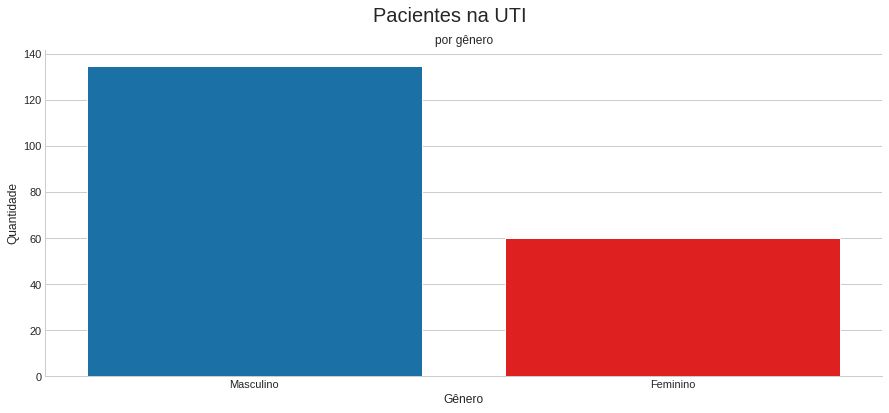

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(ax=ax, x=genero_uti['genero'], y=genero_uti['total'])
def_eixos(axs=ax, xlabel='Gênero', ylabel='Quantidade', title='por gênero', suptitle='Pacientes na UTI')

plt.show()

Dos 385 pacientes do Dataset, 195 foram para a UTI, destes 135 eram do sexo masculino e 60 do sexo feminino.

Agora, como é a distribuição por percentis dos pacientes que foram para a UTI?

In [ ]:
percentil_uti = pd.DataFrame(data_uti_positivo['AGE_PERCENTIL'].value_counts())
percentil_uti.rename(columns={'AGE_PERCENTIL':'total'}, inplace=True)

<IPython.core.display.Javascript object>

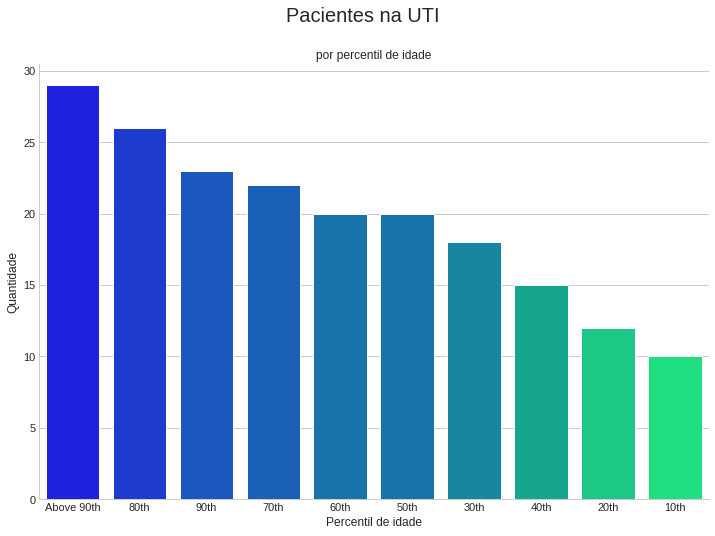

In [ ]:
fig, ax = plt.subplots()

palette = palette=mpl.cm.ScalarMappable(cmap='winter_r').to_rgba(percentil_uti['total'])
sns.barplot(ax=ax, x=percentil_uti.index, y=percentil_uti['total'], palette=palette)
def_eixos(axs=ax, xlabel='Percentil de idade', ylabel='Quantidade', title='por percentil de idade', suptitle='Pacientes na UTI')

plt.show()

Como já esperado a maioria dos pacientes que deram entrada na UTI tem mais de 90 e a absoluta maioria tem mais de 60 anos.

Observando a distribuição de pacientes acima de 65 que foram para a UTI:

In [ ]:
above_65_positivo = pd.DataFrame([data_uti_positivo['AGE_ABOVE65'].value_counts()])

In [ ]:
above_65_positivo = above_65_positivo.T

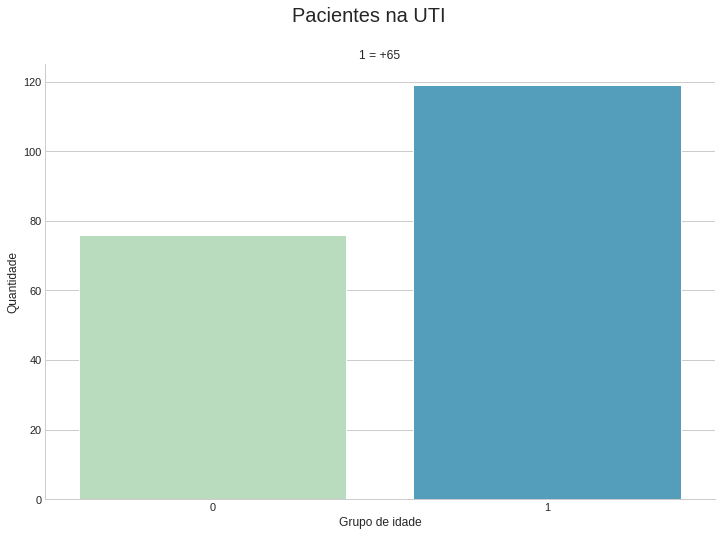

In [ ]:
make_bar_plot(above_65_positivo, above_65_positivo.index, above_65_positivo['AGE_ABOVE65'], 'GnBu',
              xlabel='Grupo de idade', ylabel='Quantidade', title='1 = +65', suptitle='Pacientes na UTI')

Como já podia-se ver no percentil de idade, pacientes com mais de 65 anos são a maioria na UTI, com 119 de 195 ou 61%. 

###Conclusões dos dados demográficos:

---
Nesta seção pudemos identificar a partir dos dados demográficos que dos 385 pacientes na base de dados, 195 foram para a UTI.

Destes, 135 eram do sexo masculino e 60 do sexo feminino, porém importante notarmos que o percentil com maior número de pacientes do sexo feminino é dos acima de 90 anos, a faixa de idade mais preocupante e afetada pela COVID-19.

Sobre os percentis pudemos observar que o maior número de pacientes que foram para a UTI tem mais de 65 anos e desses o que mais necessitou leitos de UTI foram os acima de 90 como já mencionamos, sua proporção ao longo do tempo e como são afetados pode ser visto [aqui](https://piaui.folha.uol.com.br/desde-o-comeco-do-ano-proporcao-de-idosos-nas-utis-de-covid-caiu-pela-metade-no-brasil/).

Um último ponto pertinente é que mais a frente, iremos transformar a coluna de percentis de valores categóricas para várias colunas binárias, garantindo a correta interpretação do modelo de Machine Learning.

##Observando os dados de Doenças prévias agrupadas

---
Nesta seção observaremos os dados das doenças prévias agrupadas, suas distribuições e o que estas podem nos informar sobre as relações com entrada ou não na UTI.


Identificamos que alguns pacientes a depender da janela tem 1 ou 0 em determinados grupos de doença, para evitar esses cruzamentos, iremos considerar apenas aqueles que apresentavam o determinado grupo de doença na primeira janela de 0-2 horas.

In [ ]:
df_prev_disease = data.drop(data.iloc[:,1:4], axis=1)
df_prev_disease = df_prev_disease.query("WINDOW == '0-2'")
df_prev_disease = df_prev_disease.iloc[:,:10]
df_prev_disease

,PATIENT_VISIT_IDENTIFIER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER
0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
10,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
20,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1900,380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1905,381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1910,382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1915,383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Aqui é esperado que encontremos a maioria dos pacientes sem doenças prévias, visto que apesar de não termos acesso à qual tipo especificamente de doença é, os grupos parecem se referir a doenças crônicas.

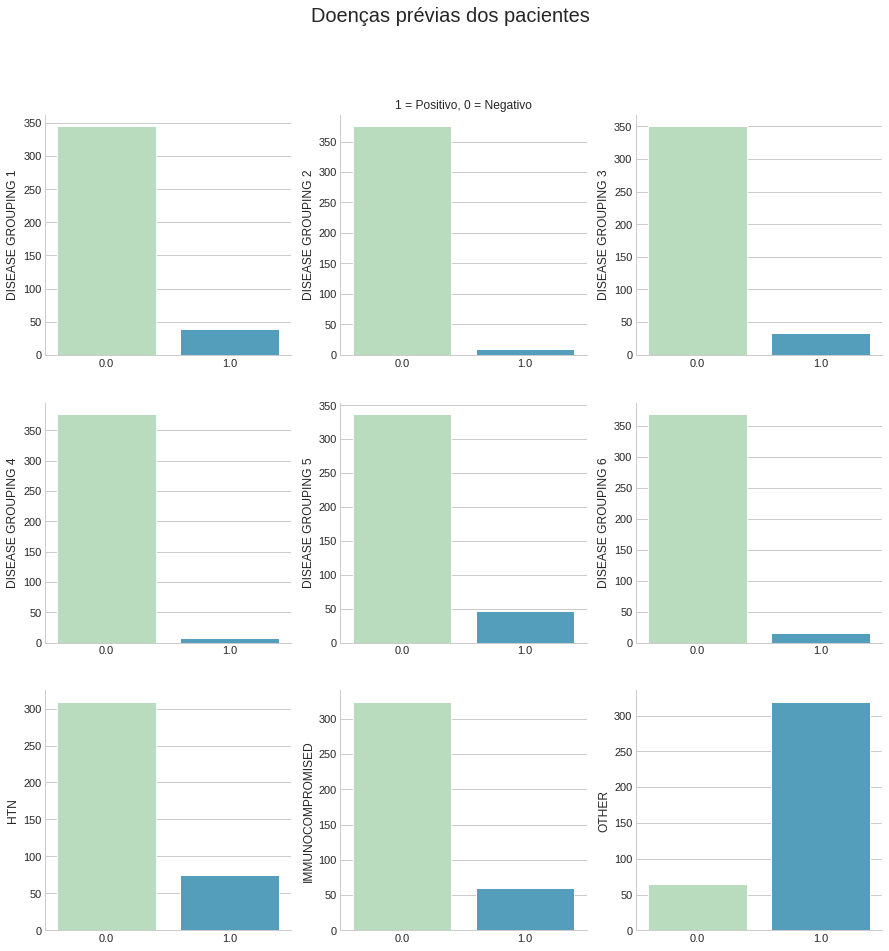

In [ ]:
make_df_value_counts(df_prev_disease['DISEASE GROUPING 1'], df_prev_disease['DISEASE GROUPING 2'],df_prev_disease['DISEASE GROUPING 3'],
                     df_prev_disease['DISEASE GROUPING 4'], df_prev_disease['DISEASE GROUPING 5'],df_prev_disease['DISEASE GROUPING 6'],
                     df_prev_disease['HTN'], df_prev_disease['IMMUNOCOMPROMISED'], df_prev_disease['OTHER'], 'GnBu',
                     'Doenças prévias dos pacientes')

Já havíamos antecipado, mas se confirmou que a maioria dos pacientes não tem doenças prévias com exceção do grupo 'Others' que pode representar uma miscelânia tão grande de doenças que acaba apresentando esse comportamento diferente.

##Observando os dados dos exames de sangue e sinais vitais

---
Nesta seção iremos observar os dados dos exames de sangue e os sinais vitais conjuntamente analisando sua distribuição e suas correlações.


In [ ]:
ex_sangue_data = data.drop(data.iloc[:,1:13], axis=1)
ex_sangue_data = ex_sangue_data.iloc[:,:-2]

In [ ]:
ex_sangue_data.head()

,PATIENT_VISIT_IDENTIFIER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
ex_sangue_data.describe()

,PATIENT_VISIT_IDENTIFIER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
count,1925.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,

Uma primeira observação é que nessas colunas temos dados em branco representados por NaN (*Not a Number* em inglês) e que necessitarão de tratamento para preenche-los.

In [ ]:
ex_sangue_data.isna().sum()

PATIENT_VISIT_IDENTIFIER              0
ALBUMIN_MEDIAN                     1104
ALBUMIN_MEAN                       1104
ALBUMIN_MIN                        1104
ALBUMIN_MAX                        1104
                                   ... 
BLOODPRESSURE_SISTOLIC_DIFF_REL     685
HEART_RATE_DIFF_REL                 685
RESPIRATORY_RATE_DIFF_REL           748
TEMPERATURE_DIFF_REL                694
OXYGEN_SATURATION_DIFF_REL          686
Length: 217, dtype: int64

A maioria dos dados de exame de sangue estão vazios.

Há uma explicação para isso: Não faz sentido ficar realizando exames de sangue nos pacientes de duas em duas horas (diferença entre as janelas). Na média esses valores não variam tanto.

Com essa ideia da pouca variação no tempo, iremos utilizar uma função para preencher esses dados e já deixá-los preparados para a aplicação de Machine Learning mais à frente, pensando em que os modelos não lidam bem com dados nulos e podem gerar distorções na previsão do modelo.

In [ ]:
#Aqui faremos as alterações diretamente no dataframe principal 'data'
data = preenche_tabela(data)

É comum que para alguns modelos de aprendizado supervisionado de máquina tenhamos que fazer uma limpeza nos dados retirando as *features* que tem alta correlação entre si, para evitar alta variância e depreciação na capacidade de predição do modelo.

Antevendo isso, iremos plotar a correlação das colunas dos exames de sangue e dos sinais vitais, que podemos olhar acima, devido ao preenchimento acabaram muitas sendo iguais.

In [ ]:
data.iloc[:,13:-2].corr()

,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
ALBUMIN_MEDIAN,1.000000,1.000000,1.000000,1.000000,NaN,-0.186628,-0.186628,-0.186628,-0.186628,NaN,-0.147306,-0.147306,-0.147306,-0.147306,NaN,0.021718,0.021718,0.021718,0.021718,NaN,0.036257,0.036257,0.036257,0.036257,NaN,-0.246655,-0.246655,-0.246655,-0.246655,NaN,0.018994,0.018994,0.018994,0.018994,NaN,0.033837,0.033837,0.033837,0.033837,NaN,-0.054241,-0.054241,-0.054241,-0.054241,NaN,-0.246838,-0.246838,-0.246838,-0.246838,NaN,-0.225130,-0.225130,-0.225130,-0.225130,NaN,-0.134029,-0.134029,-0.134029,-0.134029,NaN,0.273529,0.273529,0.273529,0.273529,NaN,0.281801,0.281801,0.281801,0.281801,NaN,-0.211231,-0

#Feature Engineering e Feature Selection

Seguindo o desafio da equipe do Sírio-libânes e também sua recomendação, excluiremos do dataframe os pacientes que deram entrada logo na primeira janela por não termos como saber se os dados registrados para eles foram feitos antes ou depois da entrada na UTI.

Em seguida prepararemos os dados trazendo a entrada ou não na UTI para a primeira janela (0-2 horas). 
A lógica por trás da escolha é a seguinte: quanto mais cedo prevermos a entrada na UTI melhor para a saúde e as chances de sobrevivência do paciente e para a organização do hospital sobre a necessidade dos leitos de UTI.

In [ ]:
#excluindo pacientes que foram para a UTI na primeira janela
data = limpa_dados(data)
data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.183673,0.183673,0.183673,0.183673,-1.0,-0.868365,-0.868365,-0.

In [ ]:
#preparando o dataframe para a janela 0-2
data_clean = data.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 352 entries, (0, 0) to (384, 1920)
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 652.2+ KB


In [ ]:
data_clean

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000

Agora podemos dropar as colunas que não tem mais uso ou pertinência no dataframe: window e o identificador do paciente.

In [ ]:
data_clean = data_clean.drop(columns=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])

Dataframe preparado vamos à parte de transformar a coluna age_percentil como já citamos antes.

Aqui faremos dois dataframes e iremos rodar as primeiras seleções de modelo com eles, um com a coluna como classes e outra criando dummy variables ou variáveis binárias para cada classe da coluna e iremos ver a qual nossos modelos respondem melhor.

In [ ]:
#transformando em variáveis binárias
data_clean_binary = pd.get_dummies(data_clean, columns=['AGE_PERCENTIL'])
icu = data_clean_binary['ICU']
data_clean_binary = data_clean_binary.drop(columns=['ICU'])
data_clean_binary['ICU'] = icu 
data_clean_binary

,,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,...,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000

In [ ]:
#transformando em classes
labelencoder = LabelEncoder()
data_clean_class = data_clean.copy()
data_clean_class['AGE_PERCENTIL'] = labelencoder.fit_transform(data_clean_class.AGE_PERCENTIL)
data_clean_class

<IPython.core.display.Javascript object>

,,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.

In [ ]:
pd.DataFrame(data_clean['ICU'].value_counts())

,ICU
0,189
1,163


Agora que preparamos e limpamos nossos dados vamos realizar uma primeira feature selection utilizando alguns métodos tradicionais.

O primeiro vai ser utilizando o SelectKbest, como estamos diante de um problema de classificação 1 - foi para UTI e 0 - Não foi para UTI, utilizaremos o parâmetro f_classif do SelectKBest.

In [ ]:
#60 colunas ou 25% colunas com mais correlação com o target (ICU) no dataframe de colunas binárias
x = data_clean_binary.drop(columns=['ICU'])
y = data_clean_binary['ICU']
f_classif1 = SelectKBest(score_func=f_classif, k=60)
fit1 = f_classif1.fit(x,y)
cols = fit1.get_support(indices=True)
data_clean_binary.iloc[:,cols]

,,AGE_ABOVE65,HTN,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,RESPIRATORY_RATE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,RESPIRATORY_RATE_MAX,AGE_PERCENTIL_10th,AGE_PERCENTIL_Above 90th
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0.0,0.183673,0.183673,0.183673,0.183673,-0.868365,-0.868365,-0.868365,-0.868365,-0.891993,-0.891993,-0.891993,-0.891993,-0.932246,-0.932246,-0.932246,-0.932246,1.000000,1.000000,1.000000,1.000000,-0.914938,-0.914938,-0.914938,-0.914938,-0.868747,-0.868747,-0.868747,-0.868747,-0.754601,-0.754601,-0.754601,-0.754601,-0.875236,-0.875236,-0.875236,-0.875236,-0.518519,-0.518519,-0.518519,-0.028571,-0.028571,-0.028571,-0.028571,-0.836145,-0.836145,-0.836145,-0.836145,0.086420,-0.593220,0.086420,-0.586207,0.736842,0.237113,-0.500000,-0.247863,-0.636364,0,0
2,10,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.912243,-0.912243,-0.912243,-0.912243,-0.780261,-0.780261,-0.780261,-0.780261,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.908714,-0.908714,-0.908714,-0.908714,-0.412965,-0.412965,-0.412965,-0.412965,-0.754601,-0.754601,-0.754601,-0.754601,-0.939887,-0.939887,-0.939887,-0.939887,-0.703704,-0.703704,-0.703704,0.085714,0.085714,0.085714,0.085714,-0.836145,-0.836145,-0.836145,-0.836145,-0.489712,-0.645951,-0.506173,-0.517241,0.947368,-0.525773,-0.714286,-0.435897,-0.575758,1,0
3,15,0,0.0,0.326531,0.326531,0.326531,0.326531,-0.968861,-0.968861,-0.968861,-0.968861,-0.891993,-0.891993,-0.891993,-0.891993,-0.959849,-0.959849,-0.959849,-0.959849,-0.828421,-0.828421,-0.828421,-0.828421,-0.836100,-0.836100,-0.836100,-0.836100,-0.784714,-0.784714,-0.784714,-0.784714,-0.779141,-0.779141,-0.779141,-0.779141,-0.503592,-0.503592,-0.503592,-0.503592,-0.777778,-0.777778,-0.777778,0.200000,0.200000,0.200000,0.200000,-0.937349,-0.937349,-0.937349,-0.937349,0.012346,-0.457627,0.012346,-0.448276,0.684211,0.175258,-0.357143,-0.299145,-0.515152,0,0
4,20,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.913659,-0.913659,-0.913659,-0.913659,-0.851024,-0.851024,-0.851024,-0.851024,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.641079,-0.641079,-0.641079,-0.641079,-0.812725,-0.812725,-0.812725,-0.812725,-0.754601,-0.754601,-0.754601,-0.754601,-0.990926,-0.990926,-0.990926,-0.990926,-0.592593,-0.592593,-0.592593,0.142857,0.142857,0.142857,0.142857,-0.903614,-0.903614,-0.903614,-0.903614,0.333333,-0.593220,0.333333,-0.586207,0.868421,0.443299,-0.571429,-0.076923,-0.575758,1,0
5,25,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.891012,-0.891012,-0.891012,-0.891012,-0.891993,-0.891993,-0.891993,-0.891993,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.340249,-0.340249,-0.340249,-0.340249,-0.846339,-0.846339,-0.846339,-0.846339,-0.754601,-0.754601,-0.754601,-0.754601,-0.997732,-0.997732,-0.997732,-0.997732,-0.666667,-0.666667,-0.666667,0.085714,0.085714,0.085714,0.085714,-0.884337,-0.884337,-0.884337,-0.884337,-0.037037,-0.525424,-0.037037,-0.517241,0.815789,0.030928,-0.428571,-0.247863,-0.575758,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
data_clean_binary_selected = data_clean_binary.iloc[:,cols]
data_clean_binary_selected['ICU'] = y
data_clean_binary_selected

,,AGE_ABOVE65,HTN,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,RESPIRATORY_RATE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,RESPIRATORY_RATE_MAX,AGE_PERCENTIL_10th,AGE_PERCENTIL_Above 90th,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0.0,0.183673,0.183673,0.183673,0.183673,-0.868365,-0.868365,-0.868365,-0.868365,-0.891993,-0.891993,-0.891993,-0.891993,-0.932246,-0.932246,-0.932246,-0.932246,1.000000,1.000000,1.000000,1.000000,-0.914938,-0.914938,-0.914938,-0.914938,-0.868747,-0.868747,-0.868747,-0.868747,-0.754601,-0.754601,-0.754601,-0.754601,-0.875236,-0.875236,-0.875236,-0.875236,-0.518519,-0.518519,-0.518519,-0.028571,-0.028571,-0.028571,-0.028571,-0.836145,-0.836145,-0.836145,-0.836145,0.086420,-0.593220,0.086420,-0.586207,0.736842,0.237113,-0.500000,-0.247863,-0.636364,0,0,1
2,10,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.912243,-0.912243,-0.912243,-0.912243,-0.780261,-0.780261,-0.780261,-0.780261,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.908714,-0.908714,-0.908714,-0.908714,-0.412965,-0.412965,-0.412965,-0.412965,-0.754601,-0.754601,-0.754601,-0.754601,-0.939887,-0.939887,-0.939887,-0.939887,-0.703704,-0.703704,-0.703704,0.085714,0.085714,0.085714,0.085714,-0.836145,-0.836145,-0.836145,-0.836145,-0.489712,-0.645951,-0.506173,-0.517241,0.947368,-0.525773,-0.714286,-0.435897,-0.575758,1,0,1
3,15,0,0.0,0.326531,0.326531,0.326531,0.326531,-0.968861,-0.968861,-0.968861,-0.968861,-0.891993,-0.891993,-0.891993,-0.891993,-0.959849,-0.959849,-0.959849,-0.959849,-0.828421,-0.828421,-0.828421,-0.828421,-0.836100,-0.836100,-0.836100,-0.836100,-0.784714,-0.784714,-0.784714,-0.784714,-0.779141,-0.779141,-0.779141,-0.779141,-0.503592,-0.503592,-0.503592,-0.503592,-0.777778,-0.777778,-0.777778,0.200000,0.200000,0.200000,0.200000,-0.937349,-0.937349,-0.937349,-0.937349,0.012346,-0.457627,0.012346,-0.448276,0.684211,0.175258,-0.357143,-0.299145,-0.515152,0,0,0
4,20,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.913659,-0.913659,-0.913659,-0.913659,-0.851024,-0.851024,-0.851024,-0.851024,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.641079,-0.641079,-0.641079,-0.641079,-0.812725,-0.812725,-0.812725,-0.812725,-0.754601,-0.754601,-0.754601,-0.754601,-0.990926,-0.990926,-0.990926,-0.990926,-0.592593,-0.592593,-0.592593,0.142857,0.142857,0.142857,0.142857,-0.903614,-0.903614,-0.903614,-0.903614,0.333333,-0.593220,0.333333,-0.586207,0.868421,0.443299,-0.571429,-0.076923,-0.575758,1,0,0
5,25,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.891012,-0.891012,-0.891012,-0.891012,-0.891993,-0.891993,-0.891993,-0.891993,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.340249,-0.340249,-0.340249,-0.340249,-0.846339,-0.846339,-0.846339,-0.846339,-0.754601,-0.754601,-0.754601,-0.754601,-0.997732,-0.997732,-0.997732,-0.997732,-0.666667,-0.666667,-0.666667,0.085714,0.085714,0.085714,0.085714,-0.884337,-0.884337,-0.884337,-0.884337,-0.037037,-0.525424,-0.037037,-0.517241,0.815789,0.030928,-0.428571,-0.247863,-0.575758,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
#60 colunas ou 25% colunas com mais correlação com o target (ICU) no dataframe de age_percentil por classes
x2 = data_clean_class.drop(columns=['ICU'])
y2 = data_clean_class['ICU']
f_classif2 = SelectKBest(score_func=f_classif, k=60)
fit2 = f_classif2.fit(x2,y2)
cols2 = fit2.get_support(indices=True)
data_clean_class.iloc[:,cols2]

,,AGE_ABOVE65,AGE_PERCENTIL,HTN,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,RESPIRATORY_RATE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,RESPIRATORY_RATE_MAX
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,5,0.0,0.183673,0.183673,0.183673,0.183673,-0.868365,-0.868365,-0.868365,-0.868365,-0.891993,-0.891993,-0.891993,-0.891993,-0.932246,-0.932246,-0.932246,-0.932246,1.000000,1.000000,1.000000,1.000000,-0.914938,-0.914938,-0.914938,-0.914938,-0.868747,-0.868747,-0.868747,-0.868747,-0.754601,-0.754601,-0.754601,-0.754601,-0.875236,-0.875236,-0.875236,-0.875236,-0.518519,-0.518519,-0.518519,-0.518519,-0.028571,-0.028571,-0.028571,-0.028571,-0.836145,-0.836145,-0.836145,-0.836145,0.086420,-0.593220,0.086420,-0.586207,0.736842,0.237113,-0.500000,-0.247863,-0.636364
2,10,0,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.912243,-0.912243,-0.912243,-0.912243,-0.780261,-0.780261,-0.780261,-0.780261,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.908714,-0.908714,-0.908714,-0.908714,-0.412965,-0.412965,-0.412965,-0.412965,-0.754601,-0.754601,-0.754601,-0.754601,-0.939887,-0.939887,-0.939887,-0.939887,-0.703704,-0.703704,-0.703704,-0.703704,0.085714,0.085714,0.085714,0.085714,-0.836145,-0.836145,-0.836145,-0.836145,-0.489712,-0.645951,-0.506173,-0.517241,0.947368,-0.525773,-0.714286,-0.435897,-0.575758
3,15,0,3,0.0,0.326531,0.326531,0.326531,0.326531,-0.968861,-0.968861,-0.968861,-0.968861,-0.891993,-0.891993,-0.891993,-0.891993,-0.959849,-0.959849,-0.959849,-0.959849,-0.828421,-0.828421,-0.828421,-0.828421,-0.836100,-0.836100,-0.836100,-0.836100,-0.784714,-0.784714,-0.784714,-0.784714,-0.779141,-0.779141,-0.779141,-0.779141,-0.503592,-0.503592,-0.503592,-0.503592,-0.777778,-0.777778,-0.777778,-0.777778,0.200000,0.200000,0.200000,0.200000,-0.937349,-0.937349,-0.937349,-0.937349,0.012346,-0.457627,0.012346,-0.448276,0.684211,0.175258,-0.357143,-0.299145,-0.515152
4,20,0,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.913659,-0.913659,-0.913659,-0.913659,-0.851024,-0.851024,-0.851024,-0.851024,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.641079,-0.641079,-0.641079,-0.641079,-0.812725,-0.812725,-0.812725,-0.812725,-0.754601,-0.754601,-0.754601,-0.754601,-0.990926,-0.990926,-0.990926,-0.990926,-0.592593,-0.592593,-0.592593,-0.592593,0.142857,0.142857,0.142857,0.142857,-0.903614,-0.903614,-0.903614,-0.903614,0.333333,-0.593220,0.333333,-0.586207,0.868421,0.443299,-0.571429,-0.076923,-0.575758
5,25,0,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.891012,-0.891012,-0.891012,-0.891012,-0.891993,-0.891993,-0.891993,-0.891993,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.340249,-0.340249,-0.340249,-0.340249,-0.846339,-0.846339,-0.846339,-0.846339,-0.754601,-0.754601,-0.754601,-0.754601,-0.997732,-0.997732,-0.997732,-0.997732,-0.666667,-0.666667,-0.666667,-0.666667,0.085714,0.085714,0.085714,0.085714,-0.884337,-0.884337,-0.884337,-0.884337,-0.037037,-0.525424,-0.037037,-0.517241,0.815789,0.030928,-0.428571,-0.247863,-0.575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
data_clean_class_selected = data_clean_class.iloc[:,cols2]
data_clean_class_selected['ICU'] = y2
data_clean_class_selected

,,AGE_ABOVE65,AGE_PERCENTIL,HTN,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,RESPIRATORY_RATE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,RESPIRATORY_RATE_MAX,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,5,0.0,0.183673,0.183673,0.183673,0.183673,-0.868365,-0.868365,-0.868365,-0.868365,-0.891993,-0.891993,-0.891993,-0.891993,-0.932246,-0.932246,-0.932246,-0.932246,1.000000,1.000000,1.000000,1.000000,-0.914938,-0.914938,-0.914938,-0.914938,-0.868747,-0.868747,-0.868747,-0.868747,-0.754601,-0.754601,-0.754601,-0.754601,-0.875236,-0.875236,-0.875236,-0.875236,-0.518519,-0.518519,-0.518519,-0.518519,-0.028571,-0.028571,-0.028571,-0.028571,-0.836145,-0.836145,-0.836145,-0.836145,0.086420,-0.593220,0.086420,-0.586207,0.736842,0.237113,-0.500000,-0.247863,-0.636364,1
2,10,0,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.912243,-0.912243,-0.912243,-0.912243,-0.780261,-0.780261,-0.780261,-0.780261,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.908714,-0.908714,-0.908714,-0.908714,-0.412965,-0.412965,-0.412965,-0.412965,-0.754601,-0.754601,-0.754601,-0.754601,-0.939887,-0.939887,-0.939887,-0.939887,-0.703704,-0.703704,-0.703704,-0.703704,0.085714,0.085714,0.085714,0.085714,-0.836145,-0.836145,-0.836145,-0.836145,-0.489712,-0.645951,-0.506173,-0.517241,0.947368,-0.525773,-0.714286,-0.435897,-0.575758,1
3,15,0,3,0.0,0.326531,0.326531,0.326531,0.326531,-0.968861,-0.968861,-0.968861,-0.968861,-0.891993,-0.891993,-0.891993,-0.891993,-0.959849,-0.959849,-0.959849,-0.959849,-0.828421,-0.828421,-0.828421,-0.828421,-0.836100,-0.836100,-0.836100,-0.836100,-0.784714,-0.784714,-0.784714,-0.784714,-0.779141,-0.779141,-0.779141,-0.779141,-0.503592,-0.503592,-0.503592,-0.503592,-0.777778,-0.777778,-0.777778,-0.777778,0.200000,0.200000,0.200000,0.200000,-0.937349,-0.937349,-0.937349,-0.937349,0.012346,-0.457627,0.012346,-0.448276,0.684211,0.175258,-0.357143,-0.299145,-0.515152,0
4,20,0,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.913659,-0.913659,-0.913659,-0.913659,-0.851024,-0.851024,-0.851024,-0.851024,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.641079,-0.641079,-0.641079,-0.641079,-0.812725,-0.812725,-0.812725,-0.812725,-0.754601,-0.754601,-0.754601,-0.754601,-0.990926,-0.990926,-0.990926,-0.990926,-0.592593,-0.592593,-0.592593,-0.592593,0.142857,0.142857,0.142857,0.142857,-0.903614,-0.903614,-0.903614,-0.903614,0.333333,-0.593220,0.333333,-0.586207,0.868421,0.443299,-0.571429,-0.076923,-0.575758,0
5,25,0,0,0.0,0.357143,0.357143,0.357143,0.357143,-0.891012,-0.891012,-0.891012,-0.891012,-0.891993,-0.891993,-0.891993,-0.891993,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.340249,-0.340249,-0.340249,-0.340249,-0.846339,-0.846339,-0.846339,-0.846339,-0.754601,-0.754601,-0.754601,-0.754601,-0.997732,-0.997732,-0.997732,-0.997732,-0.666667,-0.666667,-0.666667,-0.666667,0.085714,0.085714,0.085714,0.085714,-0.884337,-0.884337,-0.884337,-0.884337,-0.037037,-0.525424,-0.037037,-0.517241,0.815789,0.030928,-0.428571,-0.247863,-0.575758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
pd.Series(cols==cols2).value_counts()

False    32
True     28
dtype: int64

Podemos verificar uma diferença de apenas 4 colunas entre os dataframe, duas sabemos que são as classes binárias do age_percentil. O que nos mostra um bom consenso sobre as features mais correlacionadas com o target.

Como discutimos na seção de análise dos exames de sangue, é importante nos modelos de classificação evitar as colunas altamente correlacionadas, portanto, após a seleção do 25% de colunas mais correlacionadas, iremos agora retirar as altamente correlacionas entre si.

In [ ]:
corr_matrix = data_clean_binary_selected.iloc[:,1:-3].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.9)]
data_clean_binary_selected = data_clean_binary_selected.drop(columns=to_drop)
data_clean_binary_selected

,,AGE_ABOVE65,HTN,CALCIUM_MEDIAN,CREATININ_MEDIAN,GLUCOSE_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,POTASSIUM_MEAN,SODIUM_MEDIAN,UREA_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,OXYGEN_SATURATION_MEDIAN,AGE_PERCENTIL_10th,AGE_PERCENTIL_Above 90th,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
0,0,1,0.0,0.183673,-0.868365,-0.891993,-0.932246,1.000000,-0.914938,-0.868747,-0.754601,-0.875236,-0.518519,-0.028571,-0.836145,0.086420,-0.593220,0.736842,0,0,1
2,10,0,0.0,0.357143,-0.912243,-0.780261,-0.959849,1.000000,-0.908714,-0.412965,-0.754601,-0.939887,-0.703704,0.085714,-0.836145,-0.489712,-0.645951,0.947368,1,0,1
3,15,0,0.0,0.326531,-0.968861,-0.891993,-0.959849,-0.828421,-0.836100,-0.784714,-0.779141,-0.503592,-0.777778,0.200000,-0.937349,0.012346,-0.457627,0.684211,0,0,0
4,20,0,0.0,0.357143,-0.913659,-0.851024,-0.959849,1.000000,-0.641079,-0.812725,-0.754601,-0.990926,-0.592593,0.142857,-0.903614,0.333333,-0.593220,0.868421,1,0,0
5,25,0,0.0,0.357143,-0.891012,-0.891993,-0.959849,1.000000,-0.340249,-0.846339,-0.754601,-0.997732,-0.666667,0.085714,-0.884337,-0.037037,-0.525424,0.815789,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,0,0.0,0.326531,-0.937721,-0.824953,-0.806775,1.000000,-0.879668,-0.749100,-0.754601,-0.565974,-0.629630,-0.428571,-0.860241,-0.160494,-0.457627,0.736842,0,0,1
381,1905,1,0.0,0.285714,-0.886766,-0.891993,-0.959849,1.000000,-0.921162,-0.834334,-0.754601,-0.993195,-0.518519,-0.314286,-0.855422,-0.407407,-0.457627,0.526316,0,1,0
382,1910,0,0.0,0.357143,-0.905166,-0.891993,-0.959849,1.000000,-0.838174,-0.749500,-0.754601,-0.034405,-0.407407,-0.085714,-0.787952,0.012346,-0.457627,0.894737,0,0,1


In [ ]:
corr_matrix2 = data_clean_class_selected.iloc[:,2:-1].corr().abs()
upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape),k=1).astype(np.bool))
to_drop2 = [column for column in upper2.columns if any(upper2[column]>0.9)]
data_clean_class_selected = data_clean_class_selected.drop(columns=to_drop2)
data_clean_class_selected

,,AGE_ABOVE65,AGE_PERCENTIL,HTN,CALCIUM_MEDIAN,CREATININ_MEDIAN,GLUCOSE_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,POTASSIUM_MEDIAN,SODIUM_MEDIAN,UREA_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,OXYGEN_SATURATION_MEDIAN,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,
0,0,1,5,0.0,0.183673,-0.868365,-0.891993,-0.932246,1.000000,-0.914938,-0.868747,-0.754601,-0.875236,-0.518519,-0.028571,-0.836145,0.086420,-0.593220,0.736842,1
2,10,0,0,0.0,0.357143,-0.912243,-0.780261,-0.959849,1.000000,-0.908714,-0.412965,-0.754601,-0.939887,-0.703704,0.085714,-0.836145,-0.489712,-0.645951,0.947368,1
3,15,0,3,0.0,0.326531,-0.968861,-0.891993,-0.959849,-0.828421,-0.836100,-0.784714,-0.779141,-0.503592,-0.777778,0.200000,-0.937349,0.012346,-0.457627,0.684211,0
4,20,0,0,0.0,0.357143,-0.913659,-0.851024,-0.959849,1.000000,-0.641079,-0.812725,-0.754601,-0.990926,-0.592593,0.142857,-0.903614,0.333333,-0.593220,0.868421,0
5,25,0,0,0.0,0.357143,-0.891012,-0.891993,-0.959849,1.000000,-0.340249,-0.846339,-0.754601,-0.997732,-0.666667,0.085714,-0.884337,-0.037037,-0.525424,0.815789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,0,3,0.0,0.326531,-0.937721,-0.824953,-0.806775,1.000000,-0.879668,-0.749100,-0.754601,-0.565974,-0.629630,-0.428571,-0.860241,-0.160494,-0.457627,0.736842,1
381,1905,1,9,0.0,0.285714,-0.886766,-0.891993,-0.959849,1.000000,-0.921162,-0.834334,-0.754601,-0.993195,-0.518519,-0.314286,-0.855422,-0.407407,-0.457627,0.526316,0
382,1910,0,4,0.0,0.357143,-0.905166,-0.891993,-0.959849,1.000000,-0.838174,-0.749500,-0.754601,-0.034405,-0.407407,-0.085714,-0.787952,0.012346,-0.457627,0.894737,1


Além desses dois dataframes com Feature Selection utilizando o *SelectKBest*, iremos também fazer um dataframe com o tratamento apenas da alta correlação considerando portanto que todas as variáveis são igualmente importantes num primeiro momento.

In [ ]:
data_corr = data_clean.copy()
data_corr = pd.get_dummies(data_corr, columns=['AGE_PERCENTIL'])
icu = data_corr['ICU']
data_corr = data_corr.drop(columns=['ICU'])
data_corr['ICU'] = icu
data_corr

,,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,...,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000

In [ ]:
corr_matrix3 = data_corr.iloc[:,2:-11].corr().abs()
upper3 = corr_matrix3.where(np.triu(np.ones(corr_matrix3.shape),k=1).astype(np.bool))
to_drop3 = [column for column in upper3.columns if any(upper3[column]>0.9)]
data_corr = data_corr.drop(columns=to_drop3)
data_corr

,,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_DIFF,LACTATE_MEDIAN,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_DIFF,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,-0.932246,-1.0,1.000000,-1.0,-0.835844,-1.0,-0.914938,-1.0,-1.0,-0.170732,-1.0,-0.704142,-1.0,-0.77931,-1.0,-0.754601,-1.0,-0.875236,-1.0,0.234043,-1.0,0.363636,-1.0,-0.540721,-1.0,-0.518519,-1.0,0.939394,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0,0,0,1,0,0,0,0,1
2,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,-0.959849,-1.0,1.000000,-1.0,-0.382773,-1.0,-0.908714,-1.0,-1.0,-0.170732,-1.0,-0.704142,-1.0,-0.77931,-1.0,-0.754601,-1.0,-0.939887,-1.0,0.234043,-1.0,0.363636,-1.0,-0.399199,-1.0,-0.703704,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.836145,-1.0,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,1,0,0,0,0,0,0,0,0,0,1
3,15,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.972789,-1.0,-1.0,-1.0,0.326531,-1.0,-0.968861,-1.0,-0.194030,-1.0,-0.316589,-1.0,-0.891993,-1.0,-0.203354,-1.0,-1.0,-0.959849,-1.0,-0.828421,-1.0,-0.729239,-1.0,-0.836100,-1.0,-1.0,-0.170732,-1.0,-0.633136,-1.0,-0.77931,-1.0,-0.779141,-1.0,-0.503592,-1.0,0.234043,-1.0,0.363636,-1.0,-0.564753,-1.0,-0.777778,-1.0,0.939394,-1.0,0.580247,-1.0,0.200000,-1.0,-0.989549,-1.0,-0.956555,-1.0,-0.846633,-1.0,-0.937349,-1.0,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0,1,0,0,0,0,0,0,0
4,20,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.935113,-

##Conclusões iniciais de Feature Selection:

---


Portanto, após os tratamentos de Feature Selection temos três dataframes para testarmos os algoritmos e seu desempenho. Suas características principais:

- data_clean_binary_selected: Tem 19 colunas de features e a coluna alvo (*ICU*) e tem a coluna categórica de percentil de idade dividida em 10 colunas binárias;
- data_clean_class_selected: Tem 18 colunas de features e a coluna alvo (*ICU*) e tem a coluna categórica de percentil de idade transformada em uma coluna de numérica de classes (0 a 9);
- data_corr: Tem 103 colunas de features e a coluna alvo (*ICU*) com a coluna categórica de percentil de idade transformada em 10 colunas binárias.

Finalmente, é importante ressaltar que nenhum desses tratamentos é definitivo. Se todos os dataframes levaram a *bias* do modelo ou o modelo performar muito mal iremos realizando ajustes.

#Construindo um Benchmark Model de Classificação

---
Nesta seção mais curta construíremos um modelo o mais simples possível como benchmark de performance para os modelos que testaremos mais à frente.

Isso é importante para termos noção se realmente é necessário algum modelo sofisticado e avançado que leve a ganhos de performance e que justifique os gastos computacionais ou se um modelo simples é o melhor que podemos ter.

A lógica: fazer modelo simples e registrar a performance -> construir modelo visando bater esse benchmark e ser justificado -> bater performances e realizar ajustes e avaliações.


In [ ]:
#duumy model para o dataset 'data_corr'
np.random.seed(64698)
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='stratified', random_state=6541685)
x_data_corr = data_corr.drop(columns=['ICU'])
y_data_corr = data_corr['ICU']
x_train, x_test, y_train, y_test = train_test_split(x_data_corr, y_data_corr, stratify=y)
dummy_model.fit(x_train, y_train)
print('O score de benchmark para o dataset data_corr é:',dummy_model.score(x_test, y_test))

<IPython.core.display.Javascript object>

O score de benchmark para o dataset data_corr é: 0.4772727272727273


In [ ]:
#dummy model para o dataset 'data_clean_binary_selected'
np.random.seed(89423)
dummy_model_bin = DummyClassifier(strategy='stratified', random_state=466)
x_data_binary = data_clean_binary_selected.drop(columns=['ICU'])
y_data_binary = data_clean_binary_selected['ICU']
x_train, x_test, y_train, y_test = train_test_split(x_data_binary, y_data_binary, stratify=y)
dummy_model_bin.fit(x_train, y_train)
print('O score de benchmark para o dataset data_clean_binary_selected é:',dummy_model_bin.score(x_test, y_test))

<IPython.core.display.Javascript object>

O score de benchmark para o dataset data_clean_binary_selected é: 0.5681818181818182


In [ ]:
np.random.seed(692102)
dummy_model_class = DummyClassifier(strategy='stratified', random_state=945643)
x_data_class = data_clean_class_selected.drop(columns=['ICU'])
y_data_class = data_clean_class_selected['ICU']
x_train, x_test, y_train, y_test = train_test_split(x_data_class, y_data_class, stratify=y)
dummy_model_class.fit(x_train, y_train)
print('O score de benchmark para o dataset data_clean_class_selected é:',dummy_model_class.score(x_test, y_test))

<IPython.core.display.Javascript object>

O score de benchmark para o dataset data_clean_class_selected é: 0.4772727272727273


Temos portanto benchmarks para nosso três datasets limpos:
- 0.4772 para o dataset apenas com a limpeza de colunas altamente correlacionadas;
- 0.56 para o dataset com colunas binárias no percentil e com o selectKBest;
- 0.4772 para o dataset com coluna de classes no percentil e com o selectKBest.

In [ ]:
data_corr.to_csv("dados_clean_corr.csv", sep=',', index=False)
data_clean_binary_selected.to_csv("data_clean_binary_selected.csv", sep=',', index=False)
data_clean_class_selected.to_csv("data_clean_class_selected.csv", sep=',', index=False)

#Rodando a primeira seleção de algoritmos

---
Nesta seção utilizaremos um outro notebook que pode ser encontrado [aqui](https://github.com/EnzoGolfetti/bootcamp_ds_aplicada/blob/main/projeto_prever_uti_sirio_libanes_alura/notebook_selection_lazypredict.ipynb).

Retomando os trabalhos neste notebook, começaremos a aplicação e exploração dos modelos selecionados anteriormente.

Criamos algumas funções que preparam os dados para a aplicação dos modelos e já os rodam com o output da métricas.

Para este problema de negócio especificamente as métricas mais importantes que nos preocupamos são a ROC AUC score e o Recall score:
- A ROC AUC Score mede a probabilidade do modelo separar corretamente os pontos de cada classe do modelo, quanto mais próximo de 1 mais perto de uma separação perfeita entre os pontos está o modelo. Isso importa, porque se tratando de vidas, classificar corretamente a necessidade de UTI é altamente sensível para evitar a má alocação de recursos (nesse caso não expandindo a oferta de leitos de UTI) e de não colocar na UTI alguém que precisaria e não haver tempo hábil suficiente depois para atender esse paciente. (Mais sobre ROC AUC [aqui](https://towardsdatascience.com/intuition-behind-roc-auc-score-1456439d1f30);
- Já o Recall é uma métrica que mede quantos Verdadeiros Positivos o modelo é capaz de prever contra a soma de Verdadeiros Positivos e Falsos Negativos. Novamente ela é útil para vermos a capacidade do modelo de evitar não oferecer leitos a quem mais precisa. A fórmula do Recall é: VP / (VP+FN), mais sobre ela [aqui](https://deepchecks.com/glossary/recall-in-machine-learning/).

In [ ]:
#criando os objetos dos modelos
random_forest_model = RandomForestClassifier()
lgbm_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()
bernoulli_model = BernoulliNB()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Rodando os modelos 1 vez e computando Accuracy Score, Area Under the Curve ROC, Precision, Recall, f1-socre, Support e visualizando a Area Under the Curve ROC.

####Aplicando modelos no data_corr

<IPython.core.display.Javascript object>

Accuracy Score = 0.75
AUC = 0.8009859885832901
Report:


,precision,recall,f1-score,support
0,0.727273,0.851064,0.784314,47.00
1,0.787879,0.634146,0.702703,41.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.757576,0.742605,0.743508,88.00
weighted avg,0.755510,0.750000,0.746290,88.00


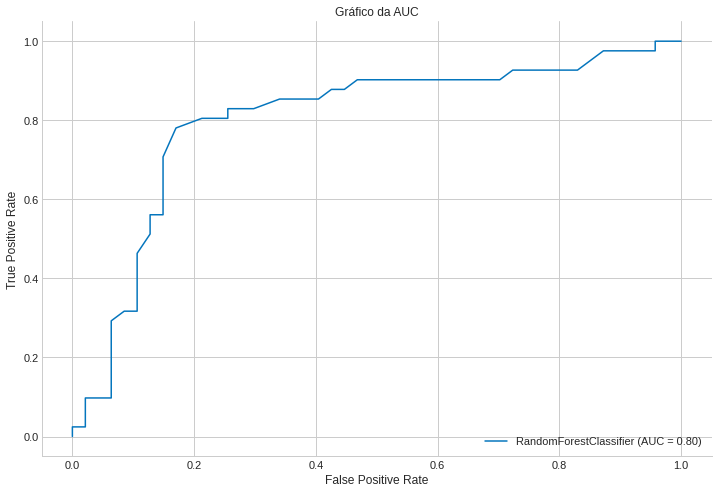

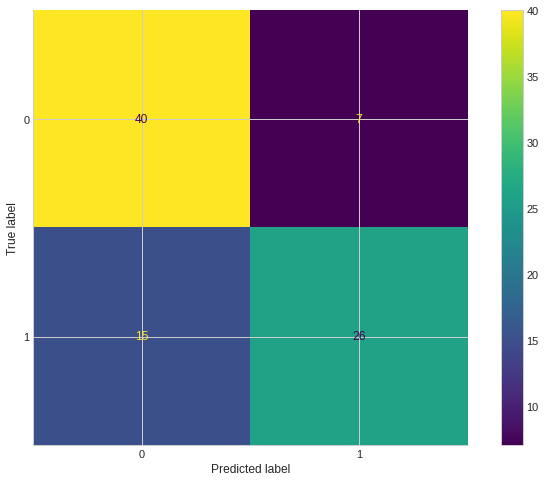

In [ ]:
#RandomForestClassifier para data_corr
run_models_com_plot(random_forest_model, data_corr)

<IPython.core.display.Javascript object>

Accuracy Score = 0.7272727272727273
AUC = 0.7483134405812143
Report:


,precision,recall,f1-score,support
0,0.709091,0.829787,0.764706,47.000000
1,0.757576,0.609756,0.675676,41.000000
accuracy,0.727273,0.727273,0.727273,0.727273
macro avg,0.733333,0.719772,0.720191,88.000000
weighted avg,0.731680,0.727273,0.723226,88.000000


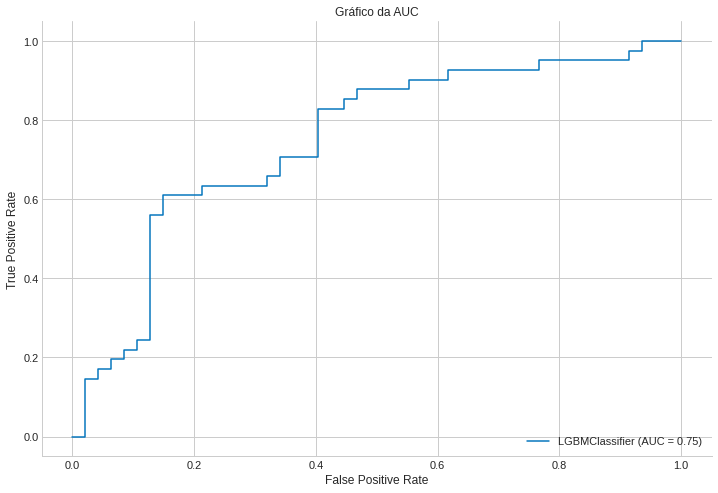

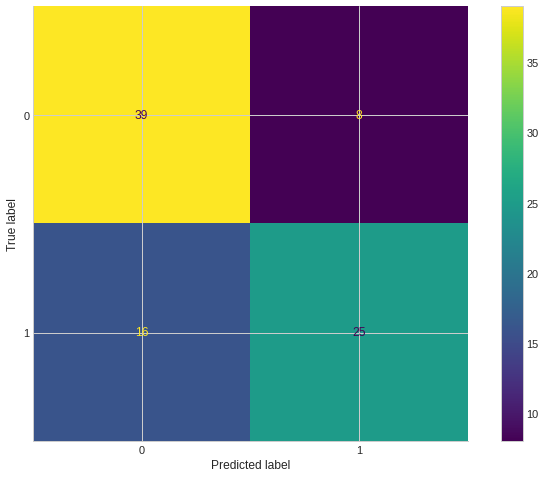

In [ ]:
#LGBM no dataset data_corr
run_models_com_plot(lgbm_model, data_corr)

<IPython.core.display.Javascript object>

Accuracy Score = 0.75
AUC = 0.7716658017644007
Report:


,precision,recall,f1-score,support
0,0.727273,0.851064,0.784314,47.00
1,0.787879,0.634146,0.702703,41.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.757576,0.742605,0.743508,88.00
weighted avg,0.755510,0.750000,0.746290,88.00


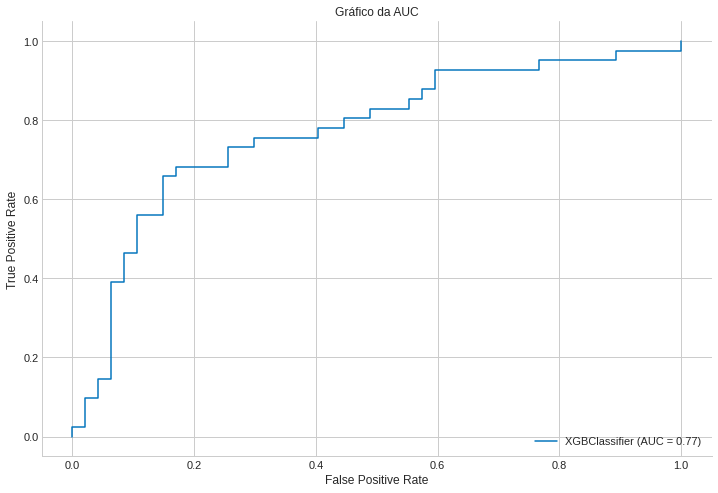

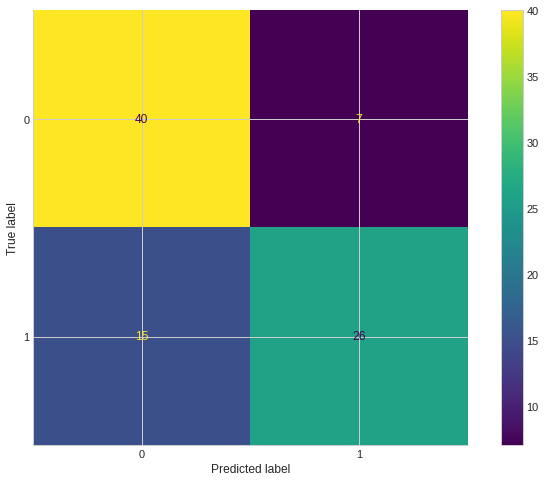

In [ ]:
#XGBmodel no dataframe data_corr
run_models_com_plot(xgb_model, data_corr)

<IPython.core.display.Javascript object>

Accuracy Score = 0.6136363636363636
AUC = 0.700570835495589
Report:


,precision,recall,f1-score,support
0,0.622642,0.702128,0.660000,47.000000
1,0.600000,0.512195,0.552632,41.000000
accuracy,0.613636,0.613636,0.613636,0.613636
macro avg,0.611321,0.607161,0.606316,88.000000
weighted avg,0.612093,0.613636,0.609976,88.000000


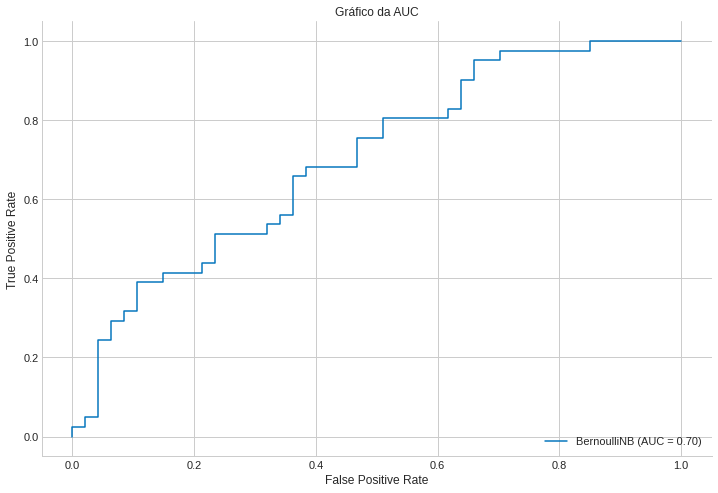

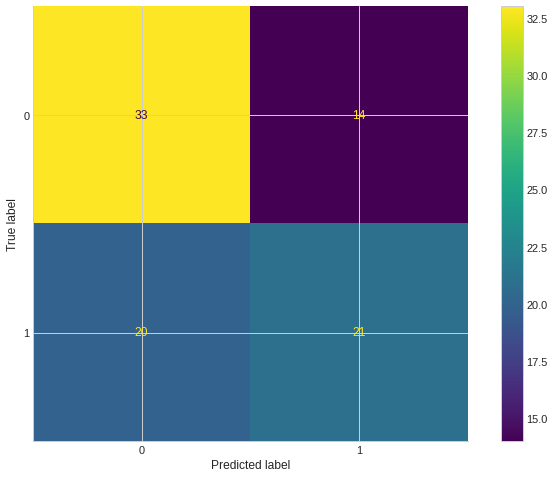

In [ ]:
#Bernoulli model no dataframe data_corr
run_models_com_plot(bernoulli_model, data_corr)

Em ordem com o encontrado no LazyPredict, **RandomForestClassifier** foi o modelo que melhor performou para o dataframe data_corr, com o **XGBClassifier** chegando bem próximo.

####Aplicando modelos no data_clean_binary_selected

<IPython.core.display.Javascript object>

Accuracy Score = 0.7159090909090909
AUC = 0.7729631551634665
Report:


,precision,recall,f1-score,support
0,0.703704,0.808511,0.752475,47.000000
1,0.735294,0.609756,0.666667,41.000000
accuracy,0.715909,0.715909,0.715909,0.715909
macro avg,0.719499,0.709133,0.709571,88.000000
weighted avg,0.718422,0.715909,0.712496,88.000000


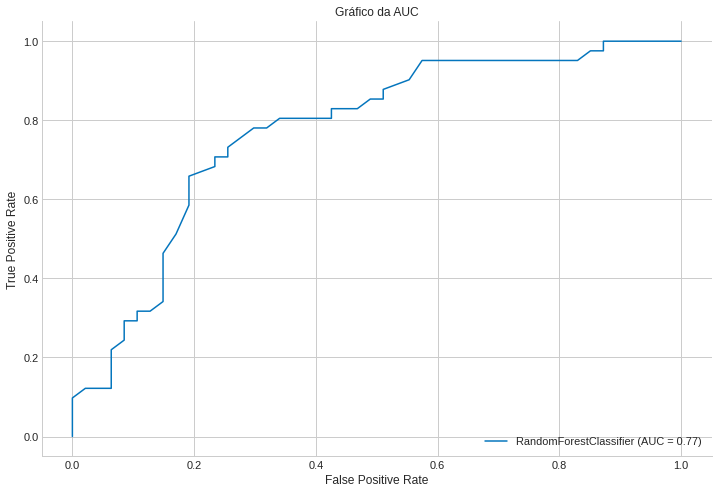

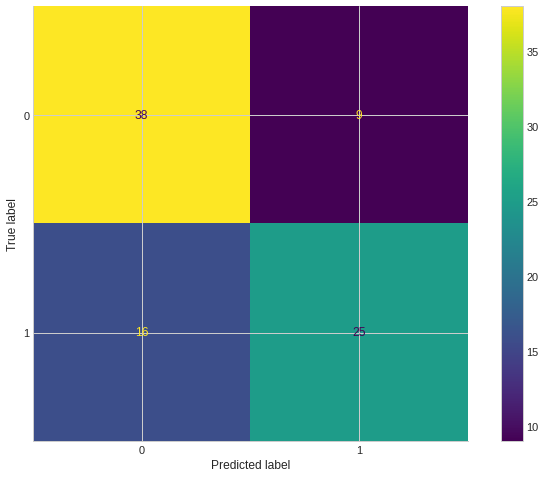

In [ ]:
#RandomForest no data_clean_binary
run_models_com_plot(random_forest_model, data_clean_binary_selected)

<IPython.core.display.Javascript object>

Accuracy Score = 0.6931818181818182
AUC = 0.7602490918526208
Report:


,precision,recall,f1-score,support
0,0.685185,0.787234,0.732673,47.000000
1,0.705882,0.585366,0.640000,41.000000
accuracy,0.693182,0.693182,0.693182,0.693182
macro avg,0.695534,0.686300,0.686337,88.000000
weighted avg,0.694828,0.693182,0.689496,88.000000


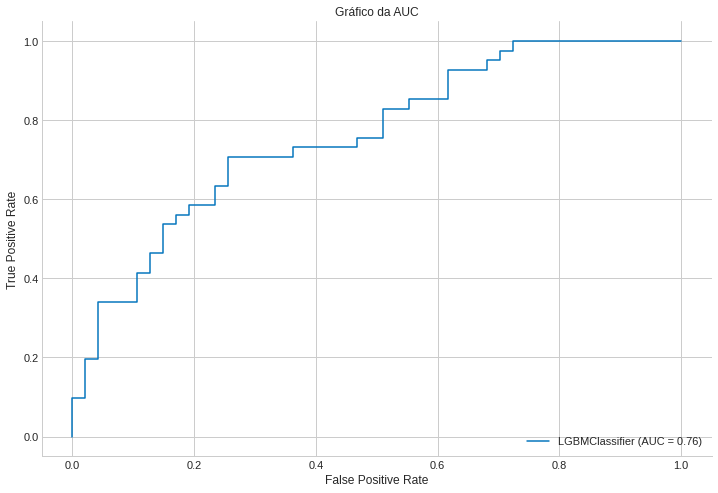

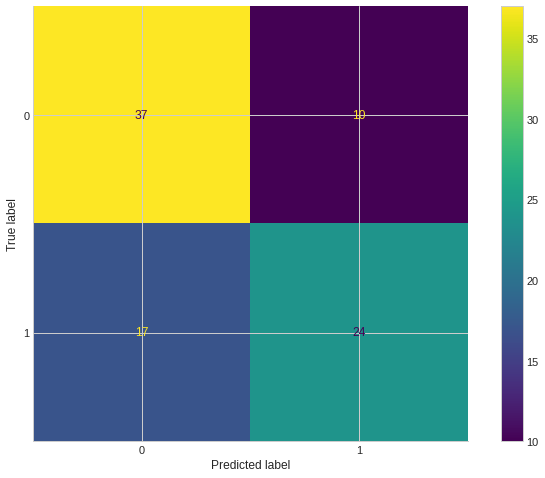

In [ ]:
#LGBM no data_clean_binary
run_models_com_plot(lgbm_model, data_clean_binary_selected)

<IPython.core.display.Javascript object>

Accuracy Score = 0.6818181818181818
AUC = 0.7529839128178516
Report:


,precision,recall,f1-score,support
0,0.679245,0.765957,0.720000,47.000000
1,0.685714,0.585366,0.631579,41.000000
accuracy,0.681818,0.681818,0.681818,0.681818
macro avg,0.682480,0.675662,0.675789,88.000000
weighted avg,0.682259,0.681818,0.678804,88.000000


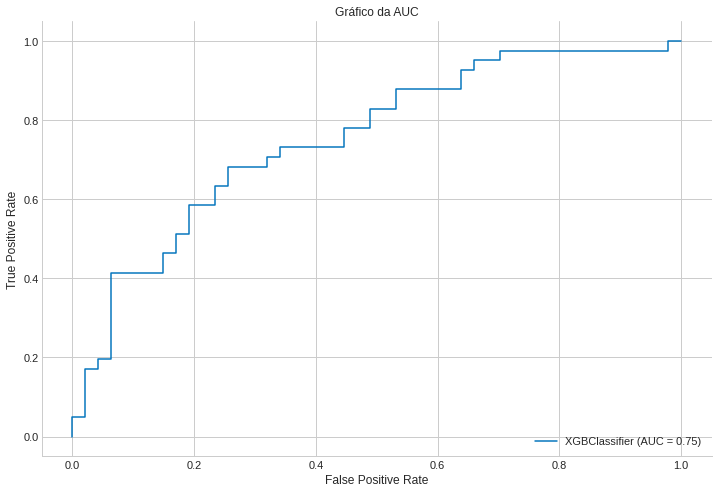

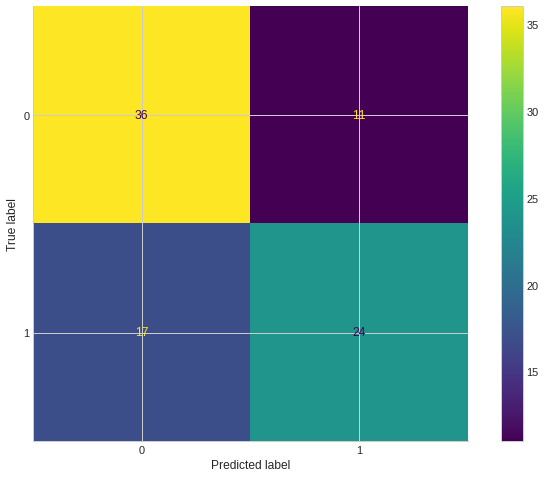

In [ ]:
#XGB no data_clean_binary
run_models_com_plot(xgb_model, data_clean_binary_selected)

<IPython.core.display.Javascript object>

Accuracy Score = 0.6363636363636364
AUC = 0.72184743124027
Report:


,precision,recall,f1-score,support
0,0.641509,0.723404,0.680000,47.000000
1,0.628571,0.536585,0.578947,41.000000
accuracy,0.636364,0.636364,0.636364,0.636364
macro avg,0.635040,0.629995,0.629474,88.000000
weighted avg,0.635481,0.636364,0.632919,88.000000


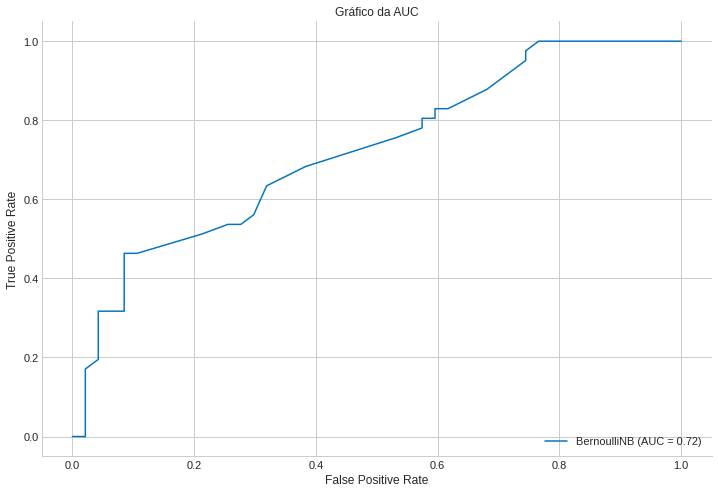

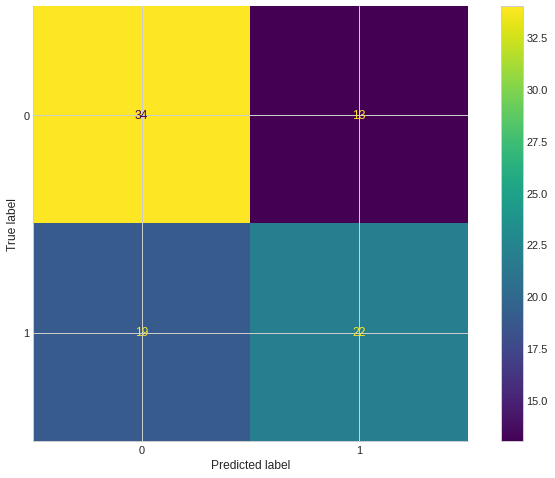

In [ ]:
#Bernoulli no data_clean_binary
run_models_com_plot(bernoulli_model, data_clean_binary_selected)

Para o dataframe data_clean_binary_selected com exceção do modelo BernoulliNB, todos os outros performaram muito próximos, com o RandomForestClassifier se sobressaindo novamente.

####Aplicando modelos no data_clean_class_selected

<IPython.core.display.Javascript object>

Accuracy Score = 0.7613636363636364
AUC = 0.8056564608199274
Report:


,precision,recall,f1-score,support
0,0.770833,0.787234,0.778947,47.000000
1,0.750000,0.731707,0.740741,41.000000
accuracy,0.761364,0.761364,0.761364,0.761364
macro avg,0.760417,0.759471,0.759844,88.000000
weighted avg,0.761127,0.761364,0.761147,88.000000


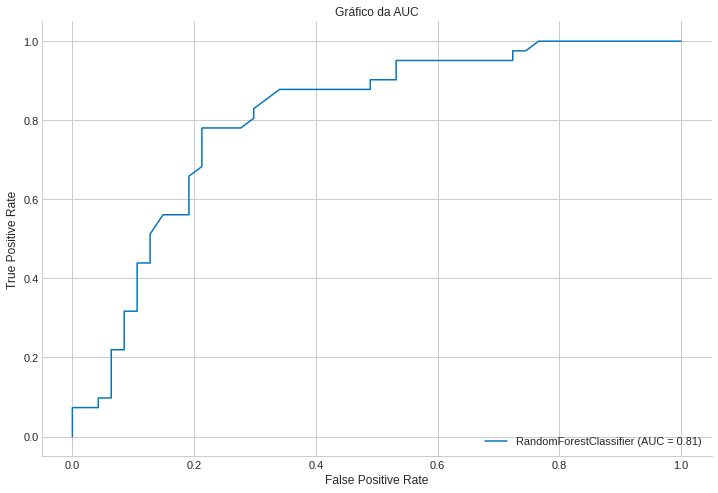

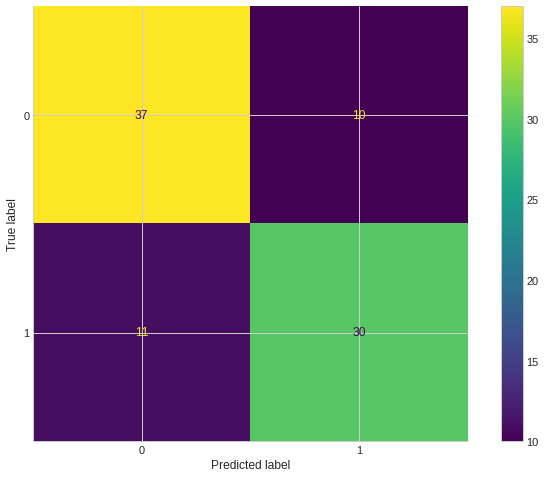

In [ ]:
#RandomForest no data_clean_class
run_models_com_plot(random_forest_model, data_clean_class_selected)

<IPython.core.display.Javascript object>

Accuracy Score = 0.6818181818181818
AUC = 0.7451997924234561
Report:


,precision,recall,f1-score,support
0,0.672727,0.787234,0.725490,47.000000
1,0.696970,0.560976,0.621622,41.000000
accuracy,0.681818,0.681818,0.681818,0.681818
macro avg,0.684848,0.674105,0.673556,88.000000
weighted avg,0.684022,0.681818,0.677097,88.000000


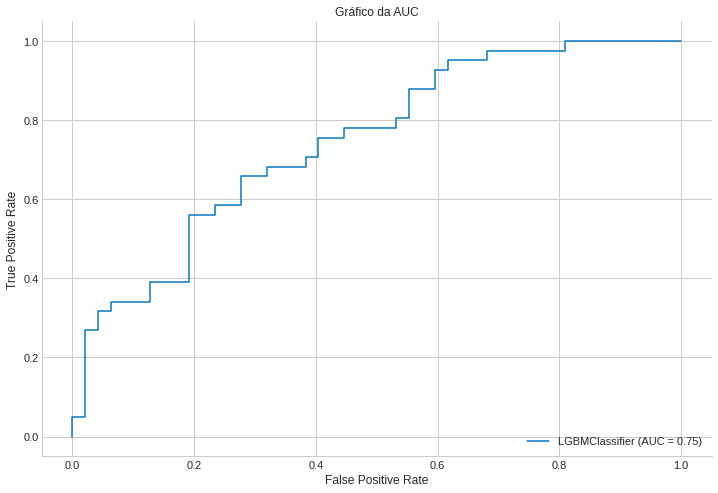

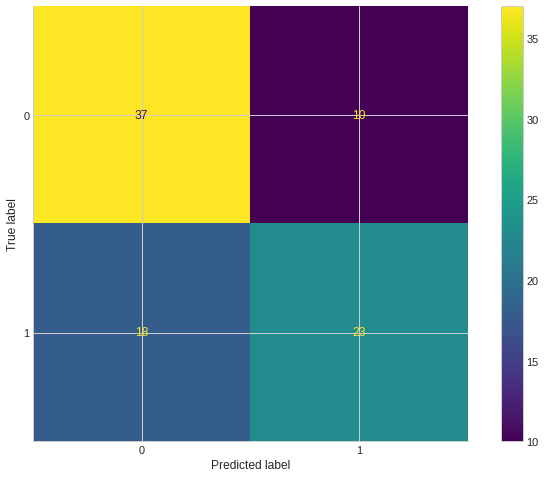

In [ ]:
#LGBM no data_clean_class
run_models_com_plot(lgbm_model, data_clean_class_selected)

<IPython.core.display.Javascript object>

Accuracy Score = 0.7159090909090909
AUC = 0.7887908666320705
Report:


,precision,recall,f1-score,support
0,0.711538,0.787234,0.747475,47.000000
1,0.722222,0.634146,0.675325,41.000000
accuracy,0.715909,0.715909,0.715909,0.715909
macro avg,0.716880,0.710690,0.711400,88.000000
weighted avg,0.716516,0.715909,0.713859,88.000000


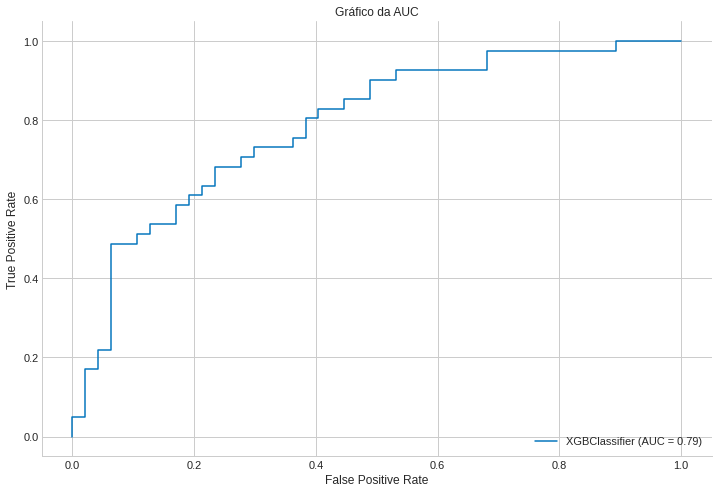

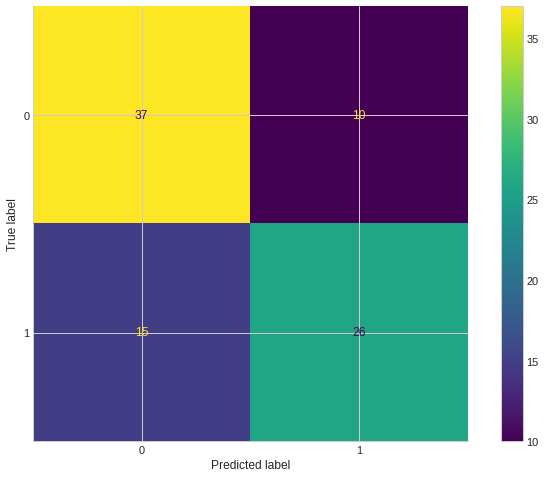

In [ ]:
#XGB no data_clean_class
run_models_com_plot(xgb_model, data_clean_class_selected)

<IPython.core.display.Javascript object>

Accuracy Score = 0.625
AUC = 0.7067981318111053
Report:


,precision,recall,f1-score,support
0,0.634615,0.702128,0.666667,47.000
1,0.611111,0.536585,0.571429,41.000
accuracy,0.625000,0.625000,0.625000,0.625
macro avg,0.622863,0.619357,0.619048,88.000
weighted avg,0.623665,0.625000,0.622294,88.000


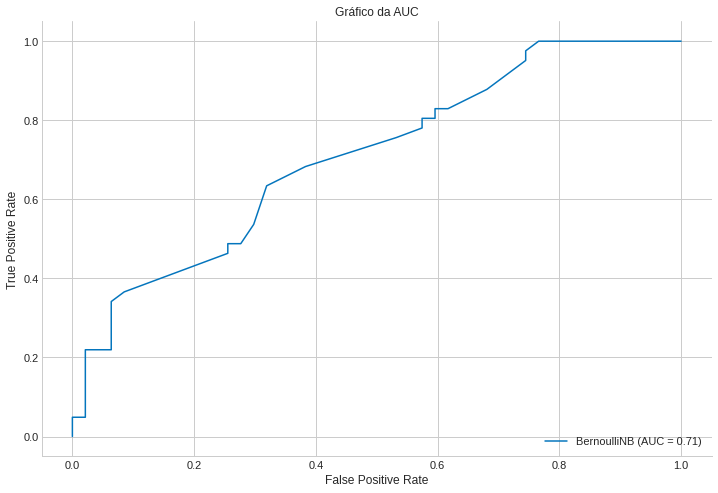

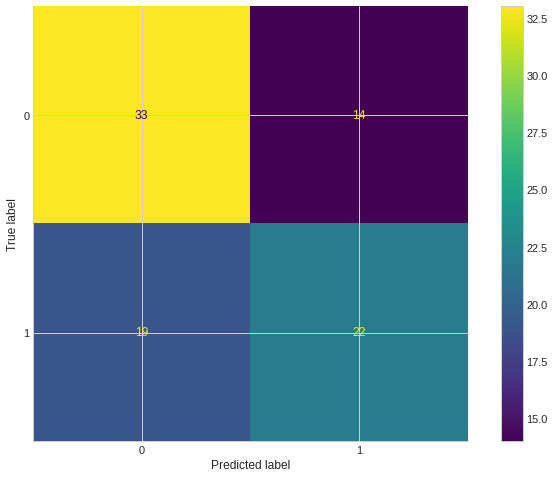

In [ ]:
#Bernoulli no data_clean_class
run_models_com_plot(bernoulli_model, data_clean_class_selected)

Finalmente, no dataset data_clean_class_selected novamente RandomForestClassifier se sobressaiu perante os outros modelos.

##Nossa conclusão destas aplicações é que iremos seguir em frente com os modelos **RandomForestClassifier** e **XGBClassifier** que tiveram bom AUC, Recall e conseguiram diminuir o número Falsos Negativos na matriz de confusão. Pudemos perceber também que o dataframe data_clean_binary_selected performou muito abaixo dos outros, principalmente no Recall, por isso deixaremos esse dataframe por aqui e prosseguiremos apenas com o data_corr e o data_clean_class_selected.

##Observando o auc médio nos modelos

---
Apesar das boas performances dos modelos e de termos embaralhado os dados para aumentar a aleatoriedade, esta ainda pode se fazer presente e estar alterando nossos resultados, para isso iremos olhar mais uma vez para a Area Under the ROC Curver porém desta vez uma AUC média de várias rodadas no modelo.


In [ ]:
#RandomForest no data_corr
roda_n_modelos(random_forest_model, data_corr, 10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AUC médio: 0.7797093928386093
Intervalo 0.7020462163803034 - 0.8573725692969152
Recall médio: 0.6585365853658536


In [ ]:
#XGB no data_corr
roda_n_modelos(xgb_model, data_corr, 10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AUC médio: 0.788168137000519
Intervalo 0.7106030845479256 - 0.8657331894531124
Recall médio: 0.673170731707317


In [ ]:
#RandomForest no data_clean_class
roda_n_modelos(random_forest_model, data_clean_class_selected, 10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AUC médio: 0.8133627400103787
Intervalo 0.7369968381259315 - 0.8897286418948258
Recall médio: 0.7170731707317073


In [ ]:
#XGB no data_clean_class
roda_n_modelos(xgb_model, data_clean_class_selected, 10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AUC médio: 0.8211728074727557
Intervalo 0.7546394250044526 - 0.8877061899410588
Recall médio: 0.7073170731707317


Rodando vários modelos e computando um AUC médio e um recall médio temos que o RandomForestClassifier no dataset data_clean_class_selected performou melhor conforme abaixo:

AUC médio: 0.8133627400103787

Intervalo 0.7369968381259315 - 0.8897286418948258

Recall médio: 0.7170731707317073

#Selecionando hiperparâmetros para os modelos

---





Nesta seção iremos realizar o processo de tunagem dos hiperparâmetros dos dois modelos. Para isso utilizaremos uma abordagem bayesiana de otimização que usa um processo gaussiano de regressão com o BayeSearchCV da biblioteca [scikit-optimizer](https://scikit-optimize.github.io/stable/auto_examples/bayesian-optimization.html#sphx-glr-auto-examples-bayesian-optimization-py). E compararemos o best_score e o best_params dos dois modelos e suas respectivas tunagens.

In [ ]:
#Definindo hiperparâmetros para otimizar nos modelos
modelos_a_treinar = [random_forest_model, xgb_model]

grid_parameters = [
                   { #RandomForest
                      'n_estimators':[100, 200, 400, 500,1000],
                      'max_depth':[10,15,20,25],
                      'max_samples':[0.7,0.75,0.8,0.85],
                      'max_features':[2,4,6,8,10]
                
                   },
                   { #XGB
                    'n_estimators': [100,400,700,1000,2000],
                    'learning_rate': [0.12],
                    'colsample_bytree': [0.7, 0.8],
                    'max_depth': [4,6,8,10,12,20],
                    'booster': ['gbtree', 'gblinear', 'dart'],
                    'reg_alpha': [1.1, 1.2],
                    'reg_lambda': [1.1, 1.2],
                    'subsample': [0.8, 0.9],
                    'num_parallel_tree': [1,3,5,10]
                    },
]

In [ ]:
np.random.seed(65841532)
shuffled_data_corr = data_corr.copy()
shuffled_data_corr = shuffled_data_corr.sample(frac=1).reset_index(drop=True)
x = shuffled_data_corr.drop(columns=['ICU'])
y = shuffled_data_corr['ICU']
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y)

models_performance = []
for i, model in enumerate(modelos_a_treinar):
  params = grid_parameters[i]
  results = tuna_hiperparametros(x_train, x_test, y_train, y_test, model, params)
  models_performance.append(results)
time.perf_counter()

<IPython.core.display.Javascript object>

7943.244564172

In [ ]:
for result in models_performance:
  print(f"Model: {type(result[0]).__name__}, ROC-AUC Score: {result[2]}, \n best_parameters: {result[3]}")

Model: RandomForestClassifier, ROC-AUC Score: 0.849507005708355, 
 best_parameters: OrderedDict([('max_depth', 10), ('max_features', 8), ('max_samples', 0.7), ('n_estimators', 200)])
Model: XGBClassifier, ROC-AUC Score: 0.8074727555786195, 
 best_parameters: OrderedDict([('booster', 'gbtree'), ('colsample_bytree', 0.8), ('learning_rate', 0.12), ('max_depth', 20), ('n_estimators', 100), ('num_parallel_tree', 1), ('reg_alpha', 1.1), ('reg_lambda', 1.1), ('subsample', 0.8)])


In [ ]:
np.random.seed(796851)
shuffled_data_class = data_clean_class_selected.copy()
shuffled_data_class = shuffled_data_class.sample(frac=1).reset_index(drop=True)
x_c = shuffled_data_class.drop(columns=['ICU'])
y_c = shuffled_data_class['ICU']
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_c,y_c, stratify=y_c)

models_performance_c = []
for i, model in enumerate(modelos_a_treinar):
  params = grid_parameters[i]
  results = tuna_hiperparametros(x_train_c, x_test_c, y_train_c, y_test_c, model, params)
  models_performance_c.append(results)
time.perf_counter()

<IPython.core.display.Javascript object>

13692.347770154

In [ ]:
for result_c in models_performance_c:
  print(f"Model: {type(result_c[0]).__name__}, Score: {result_c[2]}, best_parameters: {result_c[3]}")

Model: RandomForestClassifier, Score: 0.7950181629475869, best_parameters: OrderedDict([('max_depth', 10), ('max_features', 10), ('max_samples', 0.75), ('n_estimators', 200)])
Model: XGBClassifier, Score: 0.7861961598339388, best_parameters: OrderedDict([('booster', 'dart'), ('colsample_bytree', 0.7335241147999627), ('learning_rate', 0.12), ('max_depth', 4), ('n_estimators', 400), ('num_parallel_tree', 10), ('reg_alpha', 1.1036039607942385), ('reg_lambda', 1.1285068579225144), ('subsample', 0.8114426491381332)])


In [ ]:
random_forest_tunado = RandomForestClassifier(max_depth=10, max_features=8, max_samples=0.7, n_estimators=200)
xgb_classifier_tunado = xgb.XGBClassifier(booster='gbtree', colsample_bytree=0.8, learning_rate=0.12, max_depth=20, n_estimators=100,
                                          num_parallel_tree=1, reg_alpha=1.1, reg_lamba=1.1, subsample=0.8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Construindo um Stack and Embedded Model

---

Após essa tunagem de parâmetros podemos ver que as performances nos dois dataframes ficam próximas, com destaque para o dataframe data_corr e a RandomForestClassifier com 0.84 de ROC AUC Score.

Abaixo registramos os parâmetros para tunagem em cada modelo e agora temos uma primeira conclusão: O benchmark de classificação foi batido com o dataframe data_corr e o RandomForestClassifier.

No entanto, num movimento de melhorar ainda mais nosso modelo, iremos setar essa combinação como novo benchmark e aplicaremos um método chamado "Stack and Embedding Machine Learning" que consiste em treinar vários modelos em *layers* e depois aplicar um meta-learner final combinando todos os aprendizados de forma a conseguir melhores resultados.

Ao mesmo tempo que será o benchmark para o Stack and Embedding, o RandomForest tunado será nosso meta-learner por ter alcançado a melhor performance e capacidade de generalização.

O processo de Stack and Embedding será como na imagem abaixo:

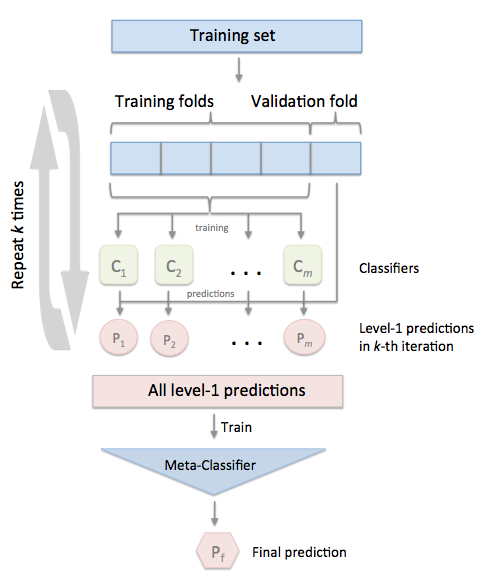

Referência sobre Stack and Embedding ML [aqui](https://developer.ibm.com/articles/stack-machine-learning-models-get-better-results/).

In [ ]:
#selecionando e nomeando os algoritmos
xgb_model = xgb.XGBClassifier(booster='gbtree', colsample_bytree=0.8, learning_rate=0.12, max_depth=20, n_estimators=100,
                                          num_parallel_tree=1, reg_alpha=1.1, reg_lamba=1.1, subsample=0.8)
lgbm_model = lgb.LGBMClassifier()
random_forest_model = RandomForestClassifier(max_depth=10, max_features=8, max_samples=0.7, n_estimators=200)
svc_model = svm.SVC()
nu_svc_model = svm.NuSVC()
nc_model = NearestCentroid()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Construindo o stackingCV
np.random.seed(8941563)
shuffled_data_corr = data_corr.copy()
shuffled_data_corr = shuffled_data_corr.sample(frac=1).reset_index(drop=True)
x = shuffled_data_corr.drop(columns=['ICU'])
y = shuffled_data_corr['ICU']
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y)
#Como há um bug entre as bibliotecas mlxtend e a xgb por esta última renomear as colunas para 'f{i}' for i in x_train.columns
#teremos qeu renomear as colunas de x_test para os mesmos nomes
for i, col in enumerate(x_test.columns):
  x_test[f'f{i}'] = x_test[col]
x_test = x_test.drop(x_test.columns[0:103], axis=1)


stacked_model = StackingCVClassifier(classifiers=(xgb_model, lgbm_model, svc_model, nu_svc_model, nc_model),
                            meta_classifier=random_forest_model, cv=10,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=True,
                            stratify=True)
stacked_model.fit(x_train.values, y_train.values)
y_pred = stacked_model.predict(x_test)
y_pred_proba = stacked_model.predict_proba(x_test)
auc_score_sclf = roc_auc_score(y_test, y_pred_proba[:,1])
recall_score_sclf = recall_score(y_test, y_pred)
print(f'O ROC AUC Score do Stacked Model é: {auc_score_sclf} \n E o recall score é: {recall_score_sclf}')

<IPython.core.display.Javascript object>

O ROC AUC Score do Stacked Model é: 0.8463933575505969 
 E o recall score é: 0.8292682926829268


In [ ]:
np.random.seed(694165)
shuffled_data_corr = data_corr.copy()
shuffled_data_corr = shuffled_data_corr.sample(frac=1).reset_index(drop=True)
x = shuffled_data_corr.drop(columns=['ICU'])
y = shuffled_data_corr['ICU']
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y)

random_forest_model.fit(x_train, y_train)
pred = random_forest_model.predict(x_test)
pred_proba = random_forest_model.predict_proba(x_test)
recall_score_rfc = recall_score(y_test, pred)
print(f'ROC AUC Score: {roc_auc_score(y_test, pred_proba[:,1])} \n recall: {recall_score_rfc}')

<IPython.core.display.Javascript object>

ROC AUC Score: 0.8604047742605085 
 recall: 0.7073170731707317


In [ ]:
roda_modelo_cv(random_forest_model, data_corr, 5, 10)

AUC Médio 0.8025766062114745 Intervalo 0.691162604786977 - 0.9139906076359721


#Conclusões sobre Stack and Embedding e escolha final de modelo

---

Após rodar o stacked model, rodamos novamente o RandomForestClassifier tunado juntamente com uma cross-validation dele e apesar de no ROC AUC Score este sozinho pontuar mais do que o Stacked Model entendemos que para este problema especificamente alcançar também um Recall maior é muito importante como já explicamos neste trabalho.

Portanto, nossa escolha final para este projeto é o **StackedClassifier com uma performance de AUC: 0.84 e Recall de 0.82.**

#Salvando o modelo final

---
Nesta seção final salvaremos nosso modelo para um arquivo permitindo que ele vá para produção e que seja utilizado em outros lugares e que possamos rodá-lo novamente sem todo o esforço de treinamento e construção que fizemos neste notebook.

Em seguida teremos uma retomada do que foi feito até aqui junto de uma conclusão final.


In [ ]:
#salvando o modelo
joblib.dump(stacked_model, 'uci_stacked_model_clf_jlib')

['uci_stacked_model_clf_jlib']

#Conclusões finais do projeto

---
Este projeto começou com a provocação de encontrarmos se era possível construir um algoritmo de Machine Learning que previsse a entrada na UTI de pacientes com COVID-19 visando auxiliar e agilizar a tomada de decisão dos gestores responsáveis.

Utilizando um dataset do hospital Sírio-libanês sobre com dados de pacientes desse perfil, exploramos os dados através da Análise Exploratória de Dados e encontramos achados importantes e que confirmam outras evidências disponíveis de que homens vão mais para a UTI por complicações da doença, pessoas mais velhas também são mais acometidas e necessitam desse atendimento e mesmo a correlação entre alguns grupos de doenças e a ida ou não para a UTI.

Em seguida realizamos um processo de Feature Selection em que tentamos extrair as principais características únicas do dataset e que tivessem boa correlação com o feature alvo.

Após esse processo nos encontramos com três dataframes para os quais construímos benchmarks individuais de modelos de classificação com o DummyClassifier. Depois aplicamos uma primeira seleção de algoritmos com a biblioteca Lazypredict, depois a partir das melhores performances nessa primeira rolagem, selecionamos os melhores na rolagem por Dataframe e passamos a aplicações mais profundas deles, observando seu desempenho com as pontuações de ROC AUC Score, Recall e na matriz de confusão.

Nos deparamos com um bom desempenho para o RandomForestClassifier e para o XGBClassifier, com estes passamos à seção de tunagem de hiperparâmetros, em que a partir de uma abordagem bayesiana selecionamos os parâmetros que nos permitissem elevar a performances dos modelos. 

Nessa conseguimos uma performance de ROC AUC Score de 0.86 com o RandomForestClassifier, o elevando ao melhor modelo.

No entanto, num esforço de melhorar ainda mais e elevar o recall do modelo, realizamos um processo de Stack and Embedding ML rodando 5 modelos com o RandomForestClassifier tunado como meta-learner.

Este modelo final apesar de um ROC AUC Score levemente menor, elevou bastante a performance de Recall, o fazendo ser nossa escolha final para o projeto. Além também não é um modelo lento de se rodar, que garante a rapidez que uma tomada de decisão desse tamanho em que vidas podem ser perdidas exige.

Todos os arquivos utilizados nesse projeto e o arquivo contendo o modelo treinado podem ser encontrados no repositório do projeto.
